In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

In [ ]:
creditcard = pd.read_csv('BankChurners.csv')
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Data Cleansing

Drop off unnecessary columns

In [ ]:
creditcard_clean = creditcard.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
creditcard_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
creditcard_clean.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [ ]:
creditcard_clean.describe(include = ['O'])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
categorical_features = creditcard_clean.select_dtypes(include=[object])
numerical_features = creditcard_clean.select_dtypes(include=[np.number])

In [ ]:
for i in categorical_features.columns:
    print(categorical_features[i].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Gender
F    5358
M    4769
Name: count, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [ ]:
numerical_features.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

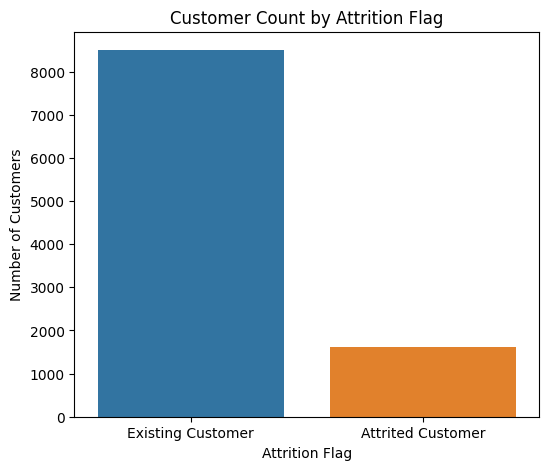

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(x='Attrition_Flag', data=creditcard_clean)
plt.title('Customer Count by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Number of Customers')
plt.show()

### The bar chart comparison of existing and attrited customers reveals an imbalance in the dataset. Our subsequent Exploratory Data Analysis (EDA) aims to identify factors contributing to customer churn. Based on these insights, we will develop retention strategies with the objective of reducing the attrition rate to under 12% in the next year.

In [ ]:
num_churned = len(creditcard_clean[creditcard_clean['Attrition_Flag'] == 'Attrited Customer'])
total_customers = len(creditcard_clean)
overall_attrition = round((num_churned / total_customers)*100, 1)
print(f'Overall attrition rate: {overall_attrition}%')

Overall attrition rate: 16.1%


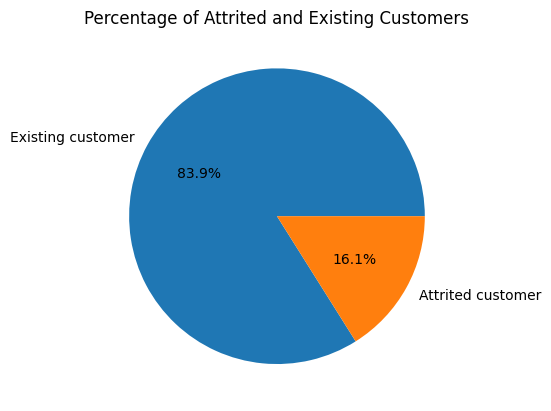

In [ ]:
attrited_percentage = creditcard_clean['Attrition_Flag'].value_counts(normalize=True) * 100
plt.pie(attrited_percentage, labels = ['Existing customer', 'Attrited customer'], autopct='%1.1f%%')
plt.title('Percentage of Attrited and Existing Customers')
plt.show()

### The overall attrition rate is 16%, and our target attrition rate is 12%.

### Create a new column named Attrition Binary, which assigned 1 to attrited customers and 0 to existing customers.

In [ ]:
creditcard_clean['Attrition_Binary']=np.where(creditcard_clean['Attrition_Flag'] == 'Attrited Customer', 1, 0)
creditcard_clean['Attrition_Binary'].head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Binary, dtype: int64

# Customers' Categorical Data

### 1. Marital Satus

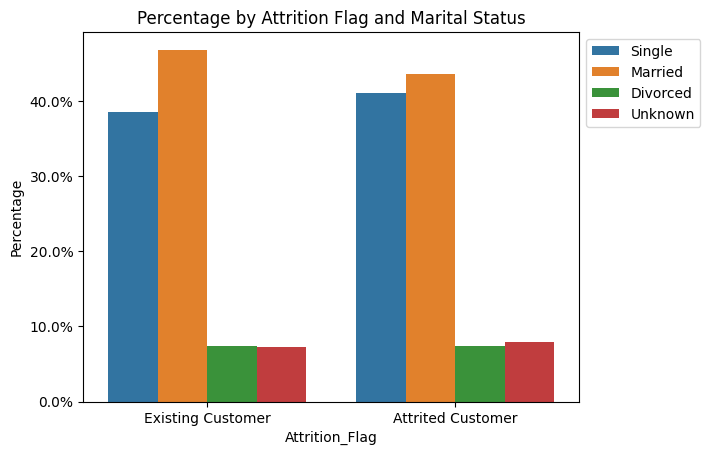

In [ ]:
marital_order = ['Single', 'Married', 'Divorced', 'Unknown']
marital_percentage = (creditcard_clean.groupby(['Attrition_Flag', 
'Marital_Status']).size()/creditcard_clean.groupby(['Attrition_Flag']).size())
marital_percentage = marital_percentage.reset_index()
marital_percentage.columns=['Attrition_Flag', 'Marital_Status', 'Percentage']
marital_percentage.sort_values('Percentage', ascending=False, inplace=True)
marital_plot = sns.barplot(x='Attrition_Flag', y='Percentage',hue='Marital_Status', hue_order=marital_order, data=marital_percentage, errorbar=None)
marital_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
marital_plot.legend(bbox_to_anchor=(1,1), loc= 'upper left')
plt.title('Percentage by Attrition Flag and Marital Status')
plt.show()

### 2. Gender

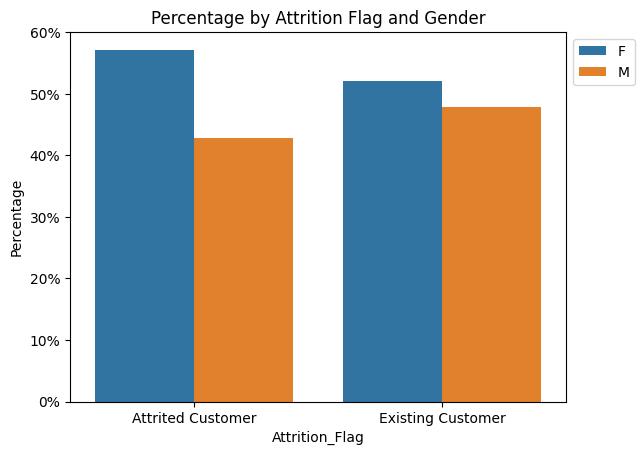

In [ ]:
gender_percentage=(creditcard_clean.groupby(['Attrition_Flag', 'Gender']).size()
                   /creditcard_clean.groupby('Attrition_Flag').size())
gender_percentage=gender_percentage.reset_index()
gender_percentage.columns = ['Attrition_Flag', 'Gender', 'Percentage']
gender_plot = sns.barplot(x='Attrition_Flag', y='Percentage', hue='Gender', data=gender_percentage, errorbar=None)
gender_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
gender_plot.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Percentage by Attrition Flag and Gender')
plt.show()

### 3. Income Category

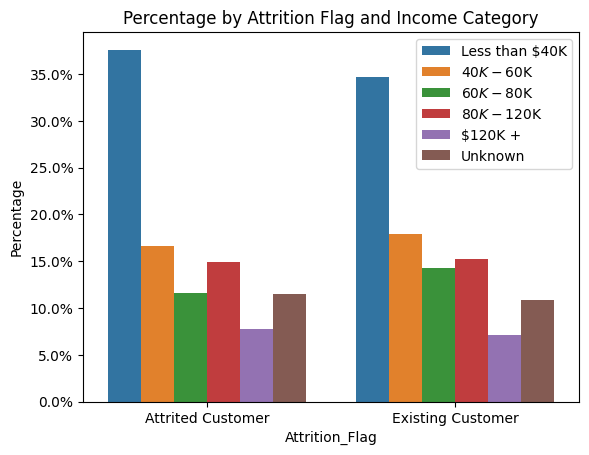

In [ ]:
income_order = ['Less than $40K' ,'$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
income_percentage=(creditcard_clean.groupby(['Attrition_Flag', 'Income_Category']).size()
                   /creditcard_clean.groupby(['Attrition_Flag']).size())
income_percentage=income_percentage.reset_index()
income_percentage.columns = ['Attrition_Flag', 'Income_Category', 'Percentage']
income_percentage.sort_values('Percentage', ascending=False, inplace=True)
income_plot = sns.barplot(x='Attrition_Flag', y='Percentage', hue='Income_Category', data=income_percentage, hue_order=income_order, errorbar=None)
income_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
income_plot.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage by Attrition Flag and Income Category')
plt.show()

### 4. Education Level

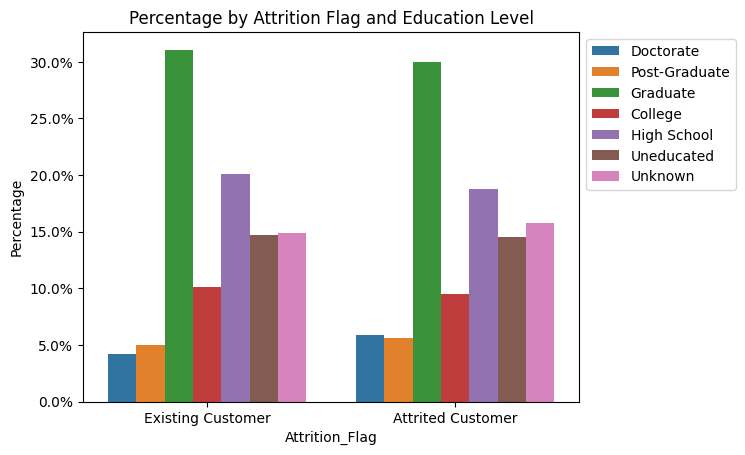

In [ ]:
education_order = ['Doctorate', 'Post-Graduate', 'Graduate', 'College', 'High School', 'Uneducated', 'Unknown']
education_percentage=(creditcard_clean.groupby(['Attrition_Flag', 'Education_Level']).size()
                     /creditcard_clean.groupby(['Attrition_Flag']).size())
education_percentage=education_percentage.reset_index()
education_percentage.columns=['Attrition_Flag', 'Education_Level', 'Percentage']
education_percentage.sort_values('Percentage', ascending=False, inplace=True)
education_plot=sns.barplot(x='Attrition_Flag', y='Percentage', hue='Education_Level', hue_order=education_order, data=education_percentage, errorbar=None)
education_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
education_plot.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage by Attrition Flag and Education Level')
plt.show()

### 5. Card Category

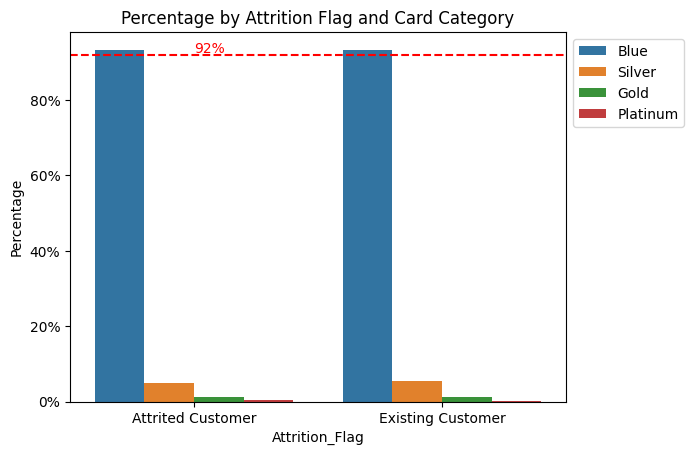

In [ ]:
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']
card_percentage=(creditcard_clean.groupby(['Attrition_Flag', 'Card_Category']).size()
                   /creditcard_clean.groupby(['Attrition_Flag']).size())
card_percentage=card_percentage.reset_index()
card_percentage.columns=['Attrition_Flag', 'Card_Category', 'Percentage']
card_plot=sns.barplot(x='Attrition_Flag', y='Percentage', hue='Card_Category', hue_order=card_order, data=card_percentage, errorbar=None)
plt.axhline(y=0.92, color='r', linestyle='--')
plt.text(0.0, 0.925, '92%', color='r')
card_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
card_plot.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Percentage by Attrition Flag and Card Category')
plt.show()

### Upon analyzing the customers’ categorical features, we found a similar distribution of variables among both attrited and existing groups. Notably, blue card users constitute over 92% of the population. For future analysis aimed at reducing the attrition rate, we suggest prioritizing blue card users, for a more efficient analysis and targeted retention offers.

# Customers' Numerical Data

### 1. Dependent Count

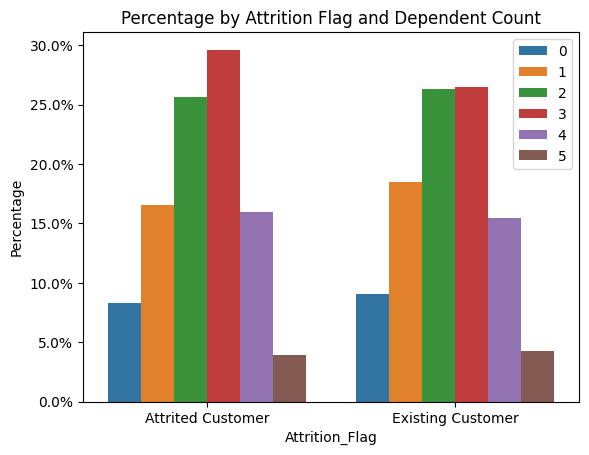

In [ ]:
dependent_percentage=(creditcard_clean.groupby(['Attrition_Flag', 'Dependent_count']).size()
                     /creditcard_clean.groupby(['Attrition_Flag']).size())
dependent_percentage=dependent_percentage.reset_index()
dependent_percentage.columns=['Attrition_Flag', 'Dependent_count', 'Percentage']
dependent_plot=sns.barplot(x='Attrition_Flag', y='Percentage', hue='Dependent_count', data=dependent_percentage, errorbar=None)
dependent_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
dependent_plot.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage by Attrition Flag and Dependent Count')
plt.show()

### 2. Total Relationship Count

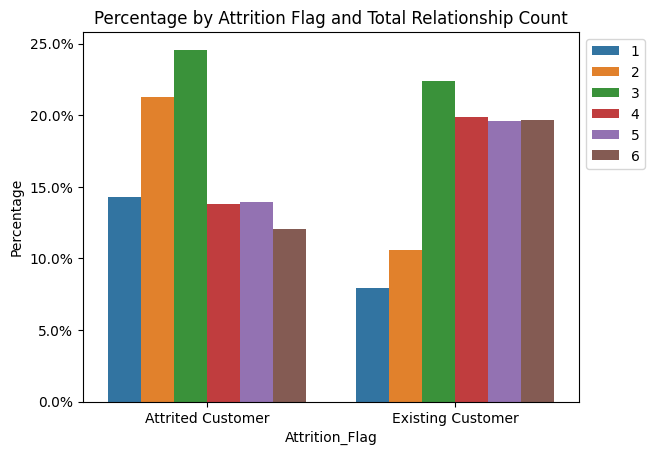

In [ ]:
totalcount_percentage=(creditcard_clean.groupby(['Attrition_Flag', 'Total_Relationship_Count']).size()
                     /creditcard_clean.groupby(['Attrition_Flag']).size())
totalcount_percentage=totalcount_percentage.reset_index()
totalcount_percentage.columns=['Attrition_Flag', 'Total_Relationship_Count', 'Percentage']
totalcount_percentage.sort_values('Percentage', ascending=False, inplace=True)
totalcount_plot=sns.barplot(x='Attrition_Flag', y='Percentage', hue='Total_Relationship_Count', data=totalcount_percentage, errorbar=None)
totalcount_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
totalcount_plot.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Percentage by Attrition Flag and Total Relationship Count')
plt.show()

### 3. Contacts Count

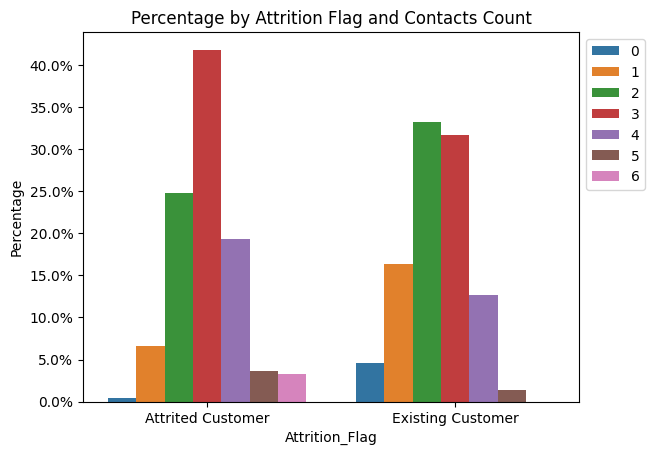

In [ ]:
contact_percentage=(creditcard_clean.groupby(['Attrition_Flag', 'Contacts_Count_12_mon']).size()
                     /creditcard_clean.groupby(['Attrition_Flag']).size())
contact_percentage=contact_percentage.reset_index()
contact_percentage.columns=['Attrition_Flag', 'Contacts_Count_12_mon', 'Percentage']
contact_plot=sns.barplot(x='Attrition_Flag', y='Percentage', hue='Contacts_Count_12_mon', data=contact_percentage, errorbar=None)
contact_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
contact_plot.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage by Attrition Flag and Contacts Count')
plt.show()

### Our analysis of customers’ numerical data revealed notable differences in the distribution of total relationship count and contact count between attrited and existing customers. Attrited customers typically have 2 to 3 bank accounts, while existing customers generally have more than 3. The majority of attrited customers have 2 to 4 contacts, predominantly 3 (above 40%), while the contact count for existing customers is usually around 2 to 3.

### 4. Average Utilization Ratio

In [ ]:
lowest_avg_utl_ratio = creditcard_clean['Avg_Utilization_Ratio'].min()
highest_avg_utl_ratio = creditcard_clean['Avg_Utilization_Ratio'].max()
print(f'Lowest Average Utilization Ratio: {lowest_avg_utl_ratio}')
print(f'Highest Average Utilization Ratio: {highest_avg_utl_ratio}')

Lowest Average Utilization Ratio: 0.0
Highest Average Utilization Ratio: 0.999


In [ ]:
bin_edges_utilizationratio = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 
0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 
0.8, 0.85, 0.9, 0.95, 1]
labels = ['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', 
          '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', '0.5-0.55', '0.55-0.6', 
          '0.6-0.65', '0.65-0.7', '0.7-0.75', '0.75-0.8', '0.8-0.85', '0.85-0.9', 
          '0.9-0.95', '0.95-1']
creditcard_clean['Avg_Utilization_Ratio_Bin'] = pd.cut(creditcard_clean['Avg_Utilization_Ratio'], bins=bin_edges_utilizationratio, labels=labels, right=False)
print(creditcard_clean[['Avg_Utilization_Ratio_Bin', 'Avg_Utilization_Ratio']])

      Avg_Utilization_Ratio_Bin  Avg_Utilization_Ratio
0                      0.05-0.1                  0.061
1                      0.1-0.15                  0.105
2                        0-0.05                  0.000
3                      0.75-0.8                  0.760
4                        0-0.05                  0.000
...                         ...                    ...
10122                  0.45-0.5                  0.462
10123                  0.5-0.55                  0.511
10124                    0-0.05                  0.000
10125                    0-0.05                  0.000
10126                  0.15-0.2                  0.189

[10127 rows x 2 columns]


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


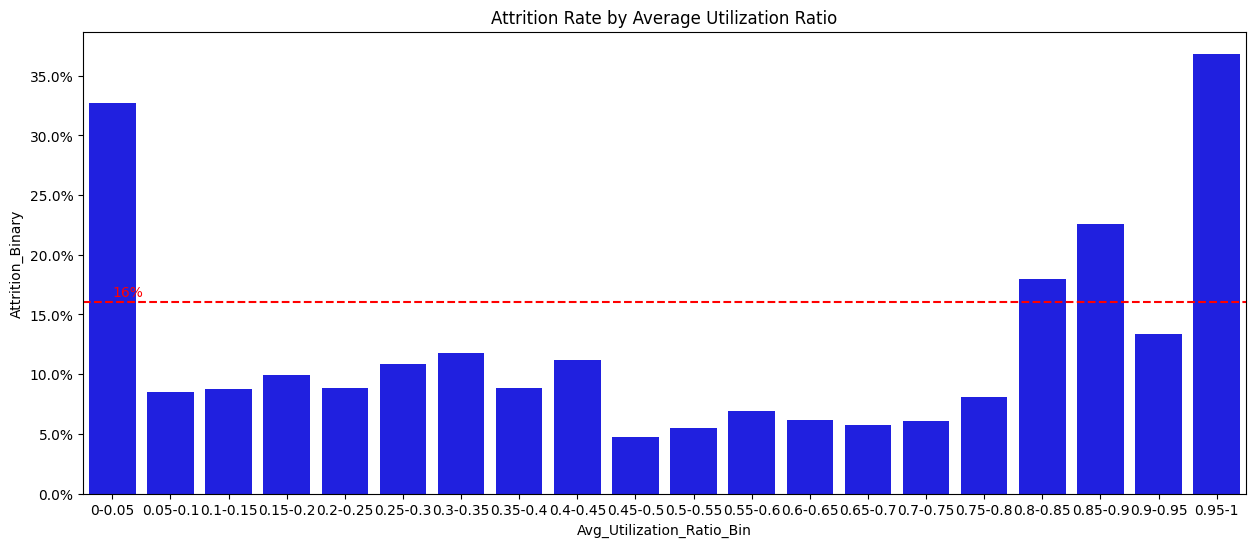

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='Avg_Utilization_Ratio_Bin', y='Attrition_Binary', data=creditcard_clean, color='blue', errorbar=None)
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.title('Attrition Rate by Average Utilization Ratio')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

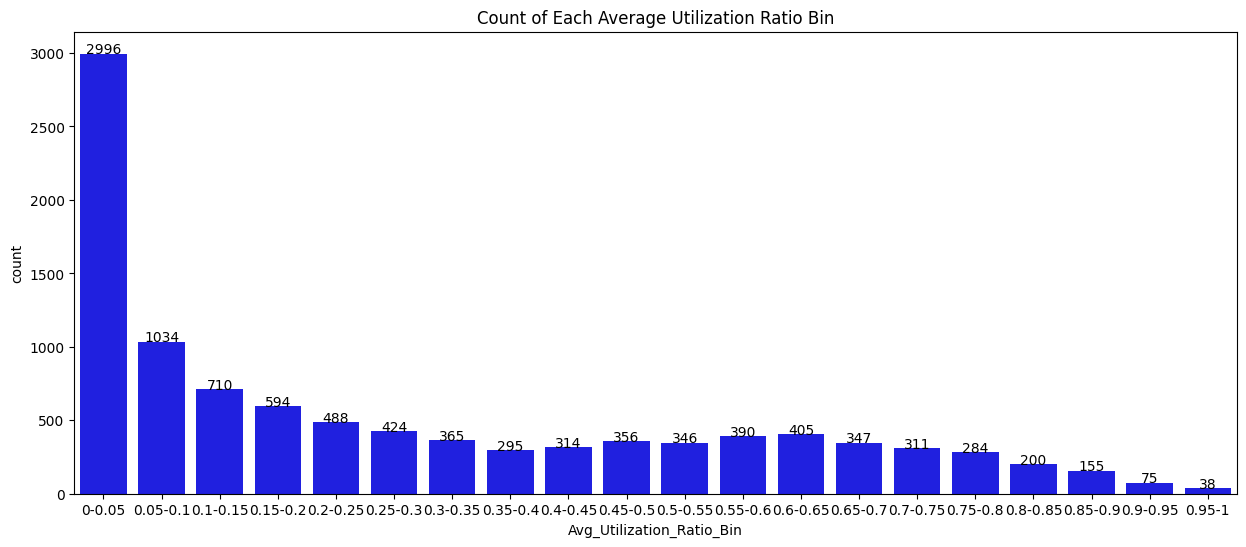

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Avg_Utilization_Ratio_Bin', data = creditcard_clean, color = 'blue')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Average Utilization Ratio Bin')
plt.show()

*Create a new column 'Avg_Utilization_Group' to divide average utilization ratio into three groups.

In [ ]:
def avg_utilization_group(row):
    if row < 0.05:
        result = 'Low Utilization'
    elif row > 0.95:
        result = 'High Utilization'
    else:
        result = 'Normal Utilization'
    return result
creditcard_clean['Avg_Utilization_Group'] = creditcard_clean['Avg_Utilization_Ratio'].apply(avg_utilization_group)
creditcard_clean.groupby('Avg_Utilization_Group')['Attrition_Binary'].mean()

Avg_Utilization_Group
High Utilization      0.368421
Low Utilization       0.327103
Normal Utilization    0.089243
Name: Attrition_Binary, dtype: float64

*Subset the dataset with the new column ' Avg_Utilization_Group' for future use in the analysis.

In [ ]:
normal_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'Normal Utilization']
low_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'Low Utilization']
high_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'High Utilization']

### Our findings indicate that customers with either a low utilization ratio (below 0.05) or a high utilization ratio (above 0.95) exhibit an attrition rate exceeding 30%. Attrition among low utilization customers could be attributed to card abandonment, while other factors might influence the attrition of high utilization customers. To create a more targeted strategic plan, we can use Average Utilization Ratio groups to further divide our customers.

### 5. Total Transaction Amount & Total Transaction Count

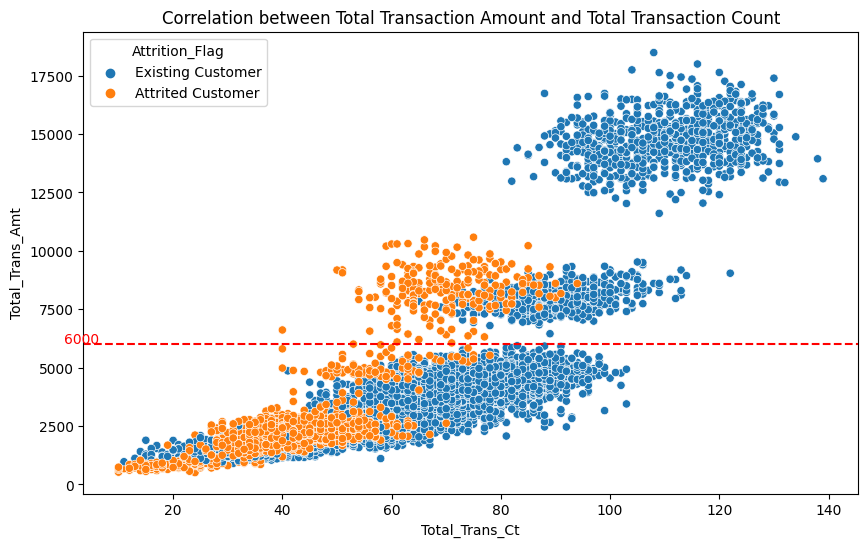

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=creditcard_clean, x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag', ax=ax)
plt.axhline(y= 6000, color='r', linestyle='--')
plt.text(0.0, 6050, '6000', color='r')
plt.title('Correlation between Total Transaction Amount and Total Transaction Count')
plt.show()

### There’s a positive linear relationship between total transaction count and amount. Customers with higher transaction counts tend to have higher transaction amounts. The scatter plot reveals three distinct clusters: roughly around $0-$6000, $6000-$11000, and above $11000.

# Further Analysis to Reduce Attrition Rate

### 1. Beside Blue Card customers, which other card category also worth noticing in our analysis?

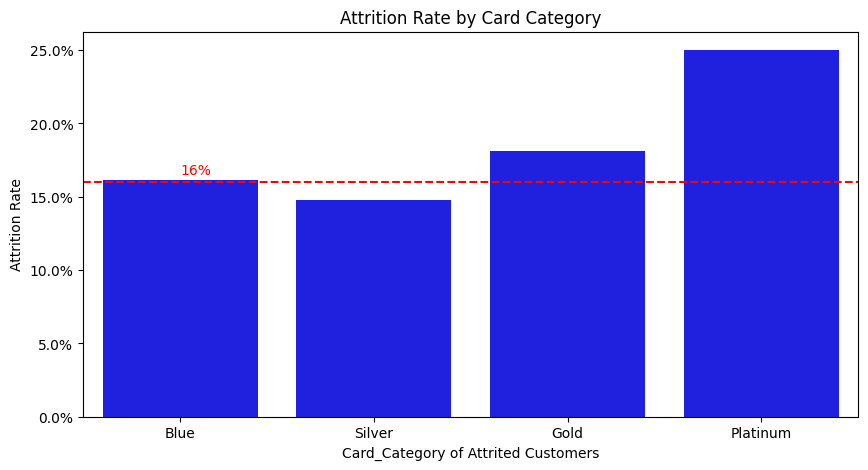

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
card_plot = sns.barplot(x='Card_Category', y='Attrition_Binary', color='blue', order=card_order, data=creditcard_clean, errorbar=None)
card_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.xlabel('Card_Category of Attrited Customers')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category')
plt.show()

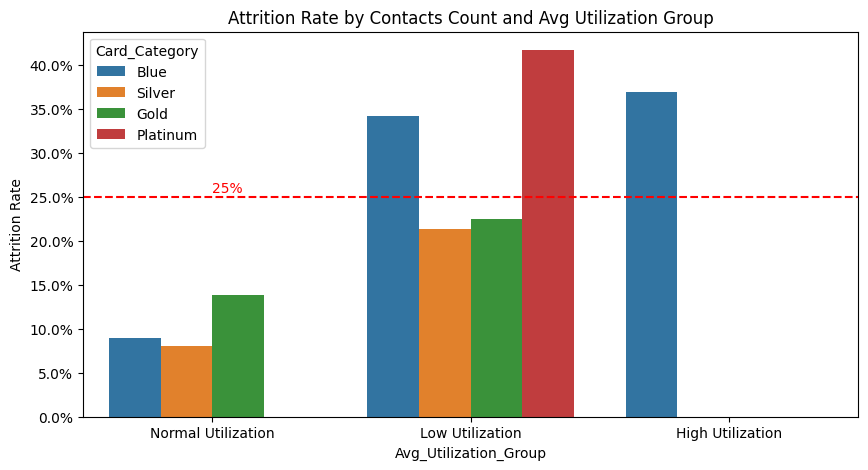

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=creditcard_clean, x='Avg_Utilization_Group', y='Attrition_Binary', hue='Card_Category', hue_order=card_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Contacts Count and Avg Utilization Group')
plt.show()

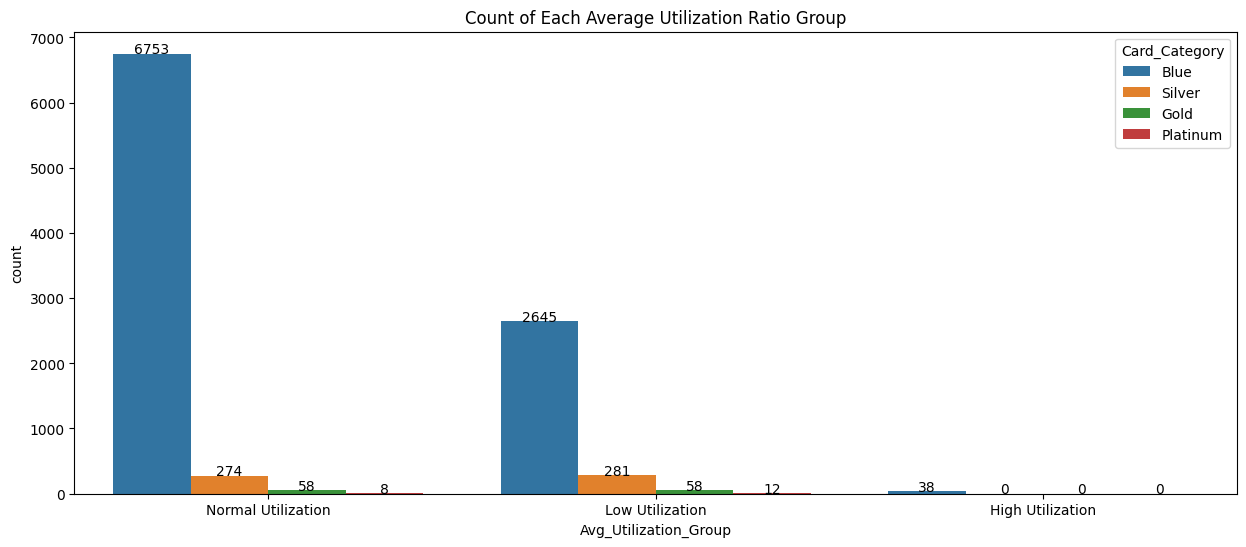

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Avg_Utilization_Group', data = creditcard_clean, hue='Card_Category', hue_order=card_order)
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Average Utilization Ratio Group')
plt.show()

### Blue Card users constitute over 92% of all customers in the dataset and exhibit high attrition rates in both low (around 35%) and high utilization groups (around 40%). Platinum Card holders in the low utilization group also show an attrition rate of about 40% (12 customers in total). Given these factors and the small sample of platinum card users, our analysis and future plans will prioritize blue card users. Also, we are attempting to set the attrition rate benchmark at 25% for more efficient analysis.

### 2. Which Marital Group Requires Focus?

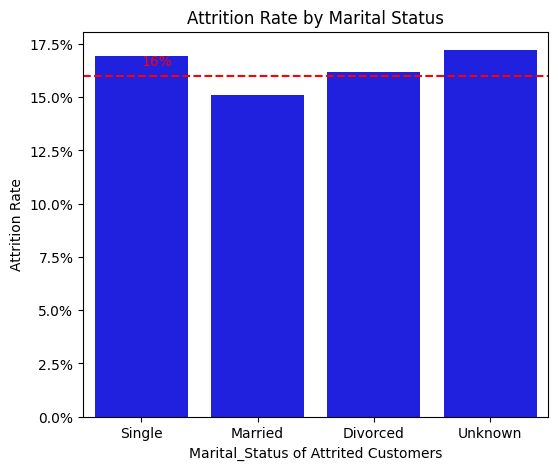

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
marital_plot = sns.barplot(x='Marital_Status', y='Attrition_Binary', color='blue', order=marital_order, data=creditcard_clean, errorbar=None)
marital_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.xlabel('Marital_Status of Attrited Customers')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Marital Status')
plt.show()

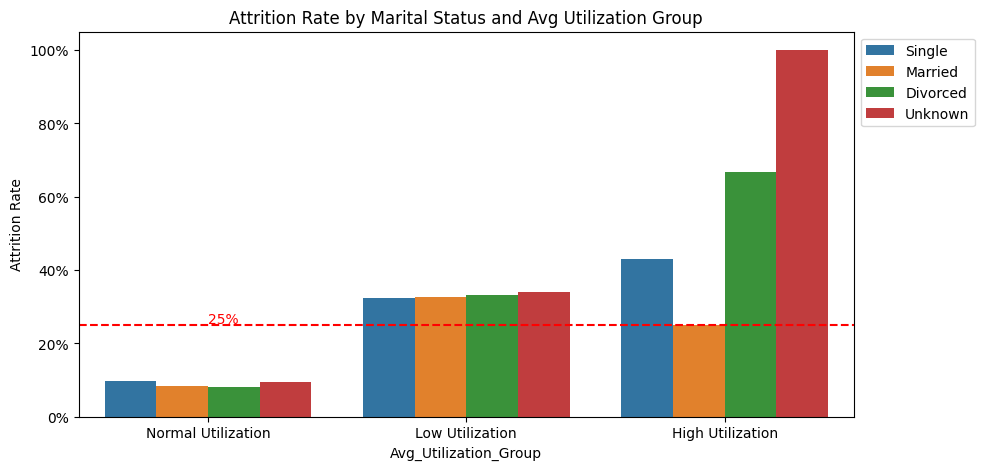

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=creditcard_clean, x='Avg_Utilization_Group', y='Attrition_Binary', hue='Marital_Status', hue_order=marital_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Marital Status and Avg Utilization Group')
plt.show()

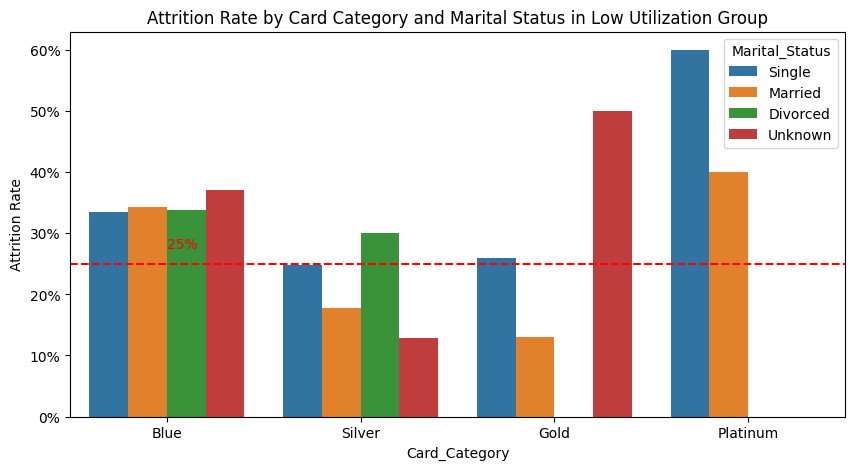

In [ ]:
low_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'Low Utilization']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=low_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Marital_Status', hue_order=marital_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.275, '25%', color='red')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Marital Status in Low Utilization Group')
plt.show()

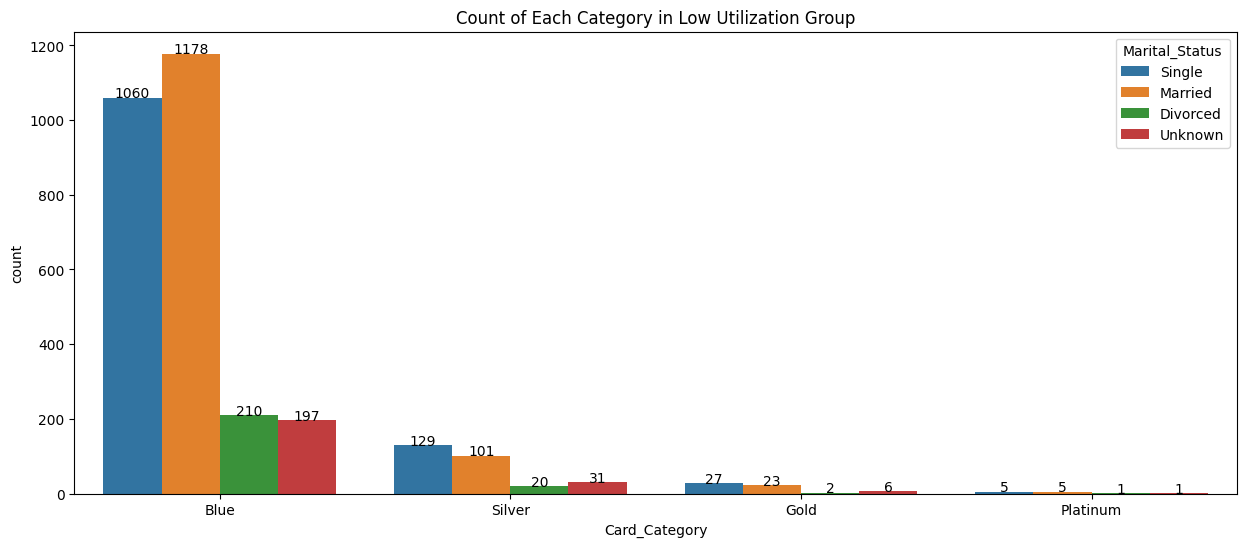

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = low_utilization_data, hue='Marital_Status', hue_order=marital_order)
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in Low Utilization Group')
plt.show()

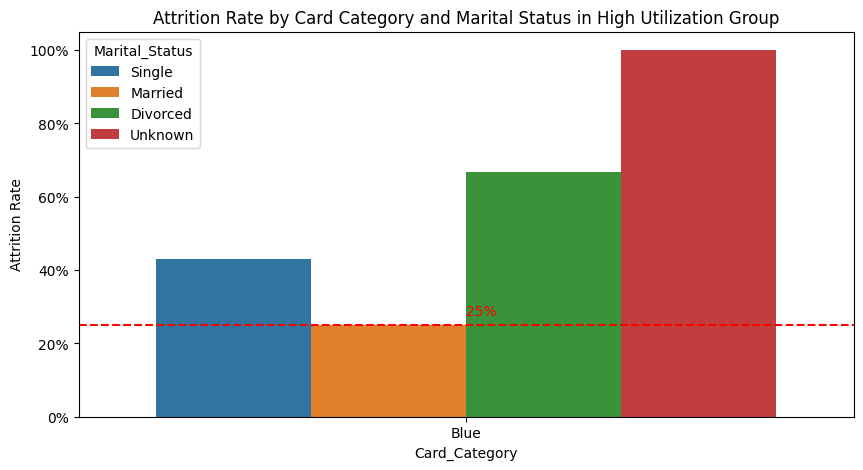

In [ ]:
high_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'High Utilization']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=high_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Marital_Status', hue_order=marital_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.275, '25%', color='red')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Marital Status in High Utilization Group')
plt.show()

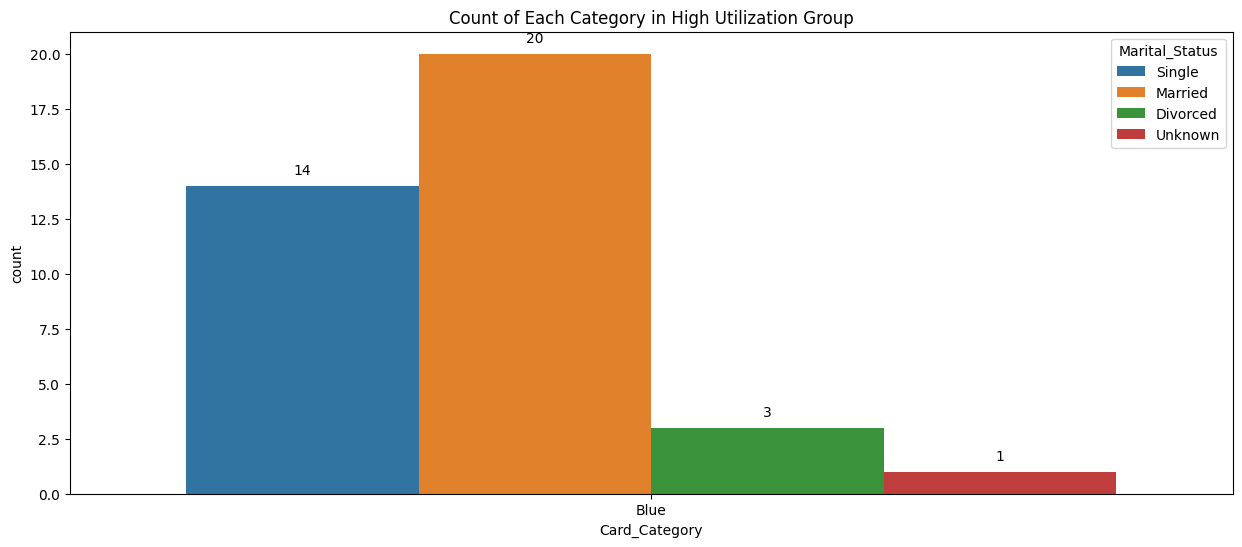

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = high_utilization_data, hue='Marital_Status', hue_order=marital_order)
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in High Utilization Group')
plt.show()

### Setting the attrition benchmark at 25%, we divided customers into low, normal, and high utilization groups. In the low utilization group, all marital statuses of blue card users require focus. In the high utilization group, we need to target single, divorced and unknown marital status blue card users. *There is only ONE customer in the high_utilization unknown group.

### 3. *Shall We Discuss Gender?

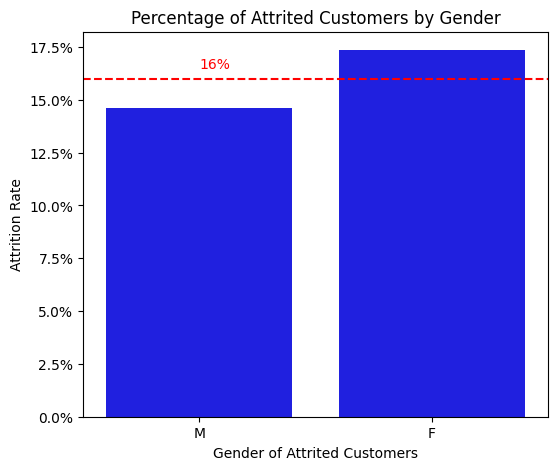

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
gender_plot = sns.barplot(x='Gender', y='Attrition_Binary', color='blue', data=creditcard_clean, errorbar=None)
gender_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.xlabel('Gender of Attrited Customers')
plt.ylabel('Attrition Rate')
plt.title('Percentage of Attrited Customers by Gender')
plt.show()

### Given the sensitive nature of gender and the legal considerations it entails, we will not further analyze this attribute in our study.

### 4. Which Income Category Requires Focus?

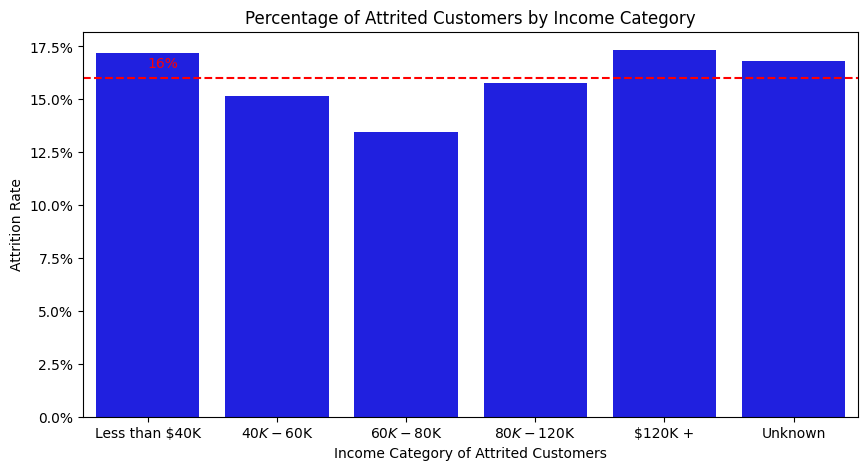

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
income_plot = sns.barplot(x='Income_Category', y='Attrition_Binary', color='blue', data=creditcard_clean, errorbar=None, order=income_order)
income_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.xlabel('Income Category of Attrited Customers')
plt.ylabel('Attrition Rate')
plt.title('Percentage of Attrited Customers by Income Category')
plt.show()

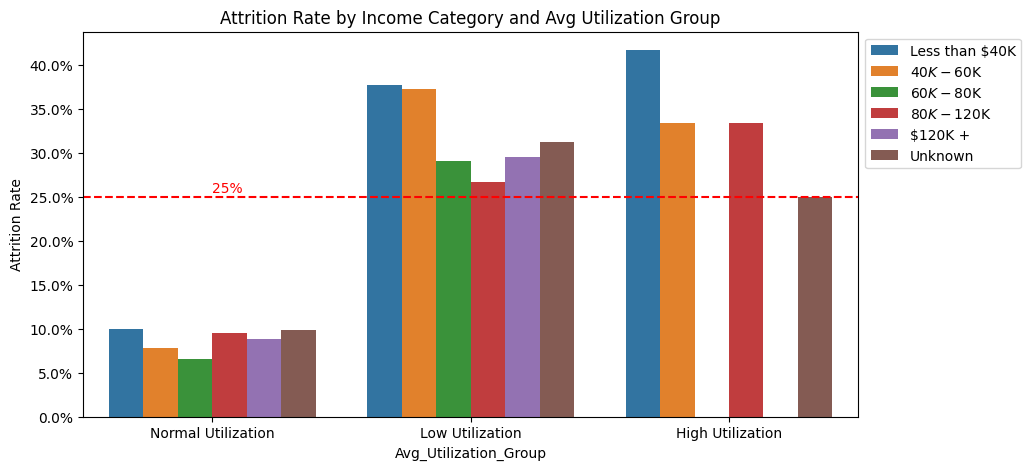

In [ ]:
income_order = ['Less than $40K' ,'$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=creditcard_clean, x='Avg_Utilization_Group', y='Attrition_Binary', hue='Income_Category', ax=ax, errorbar=None, hue_order=income_order)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Income Category and Avg Utilization Group')
plt.show()

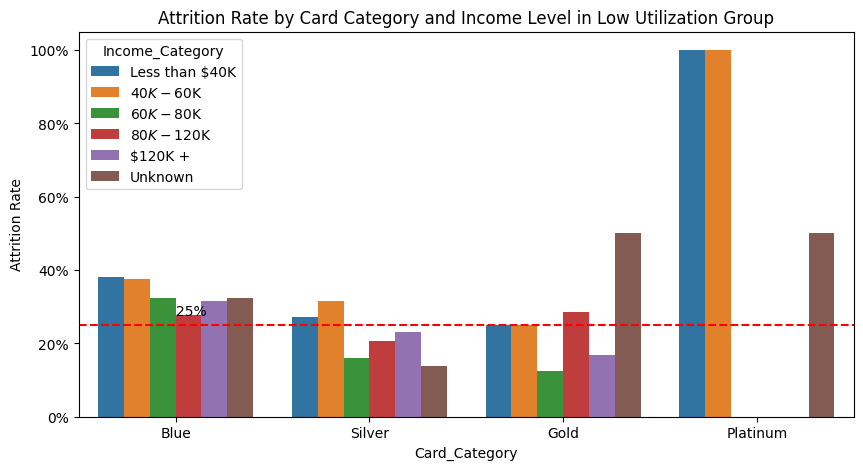

In [ ]:
low_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'Low Utilization']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=low_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Income_Category', hue_order=income_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.275, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Income Level in Low Utilization Group')
plt.show()

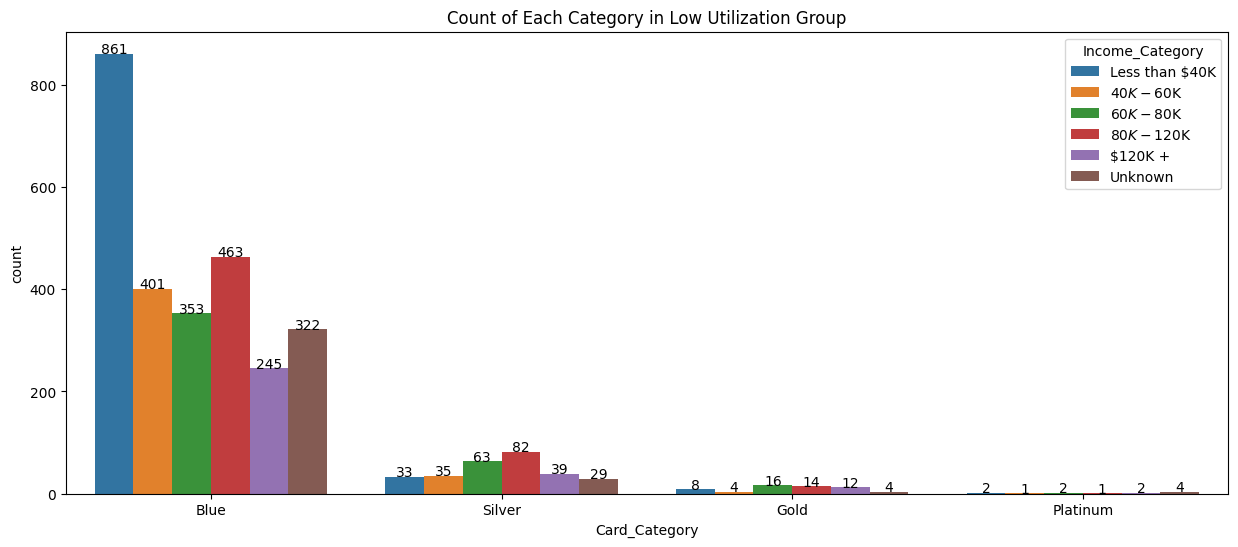

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = low_utilization_data, hue='Income_Category', hue_order=income_order)
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in Low Utilization Group')
plt.show()

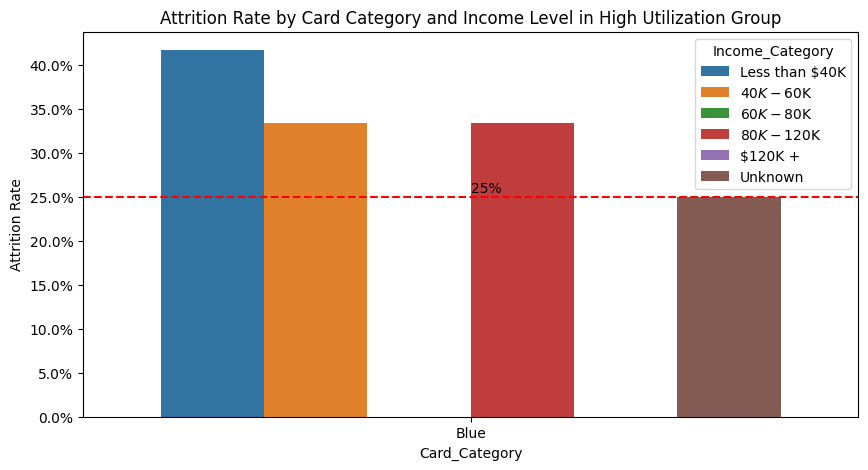

In [ ]:
high_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'High Utilization']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=high_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Income_Category', hue_order=income_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Income Level in High Utilization Group')
plt.show()

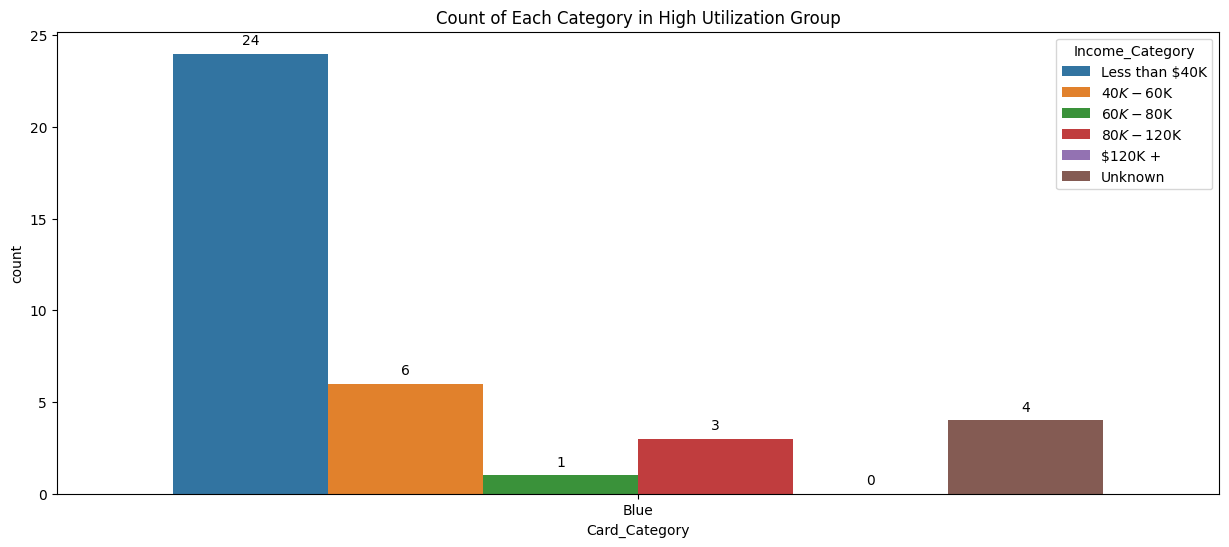

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = high_utilization_data, hue='Income_Category', hue_order=income_order)
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in High Utilization Group')
plt.show()

### In the low utilization group, with a 25% attrition benchmark, our target includes all income categories for Blue Card users, and the ‘Less than $40K’ and ‘$40K-$60K’ groups in Platinum card users(these groups have a total population of 3 with a 100% attrition rate). For the high utilization group (above 0.95), we are focusing on Blue Card users in the ‘Less than $40K’, ‘$40K - $60K’, and ‘$80K-$120K’ income groups.

### 5. Which Education Level Requires Focus?

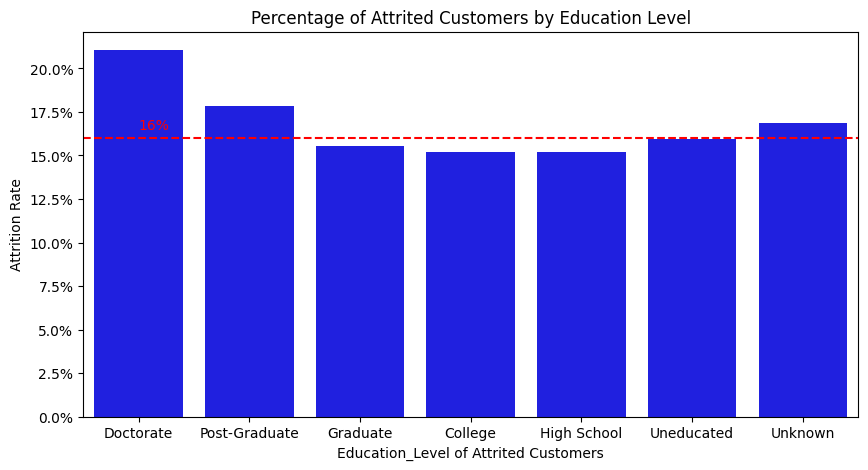

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
education_plot = sns.barplot(x='Education_Level', y='Attrition_Binary', color='blue', order=education_order, data=creditcard_clean, errorbar=None)
education_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.xlabel('Education_Level of Attrited Customers')
plt.ylabel('Attrition Rate')
plt.title('Percentage of Attrited Customers by Education Level')
plt.show()

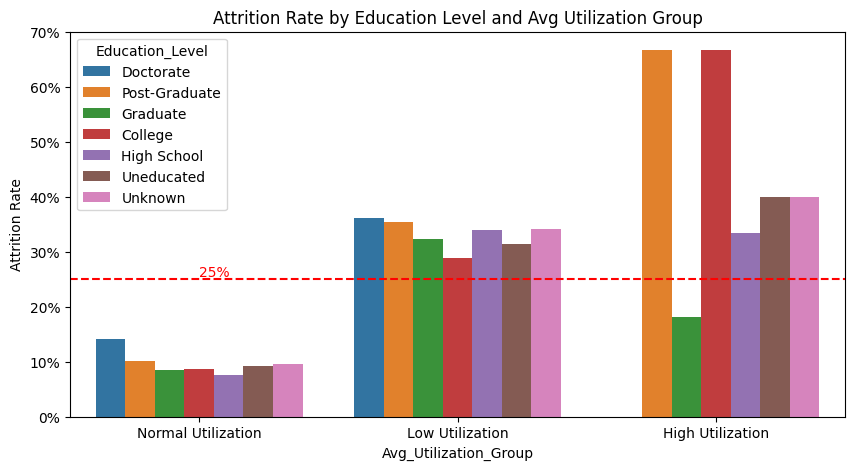

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=creditcard_clean, x='Avg_Utilization_Group', y='Attrition_Binary', hue='Education_Level', hue_order=education_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Education Level and Avg Utilization Group')
plt.show()

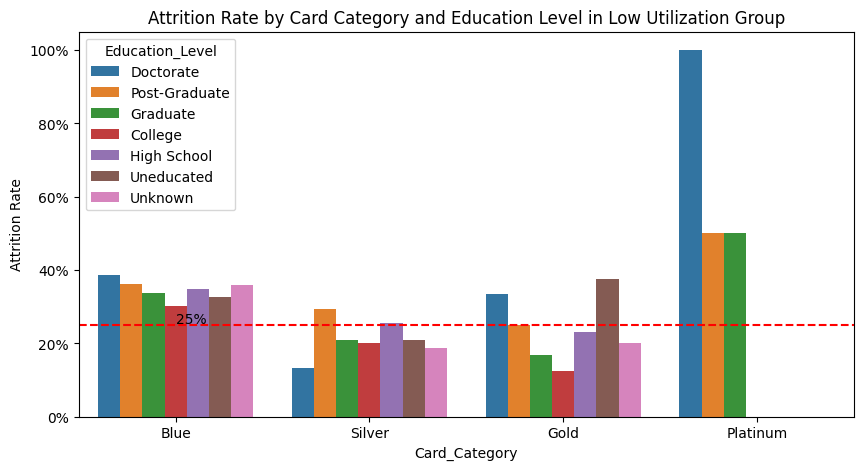

In [ ]:
low_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'Low Utilization']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=low_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Education_Level', hue_order=education_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Education Level in Low Utilization Group')
plt.show()

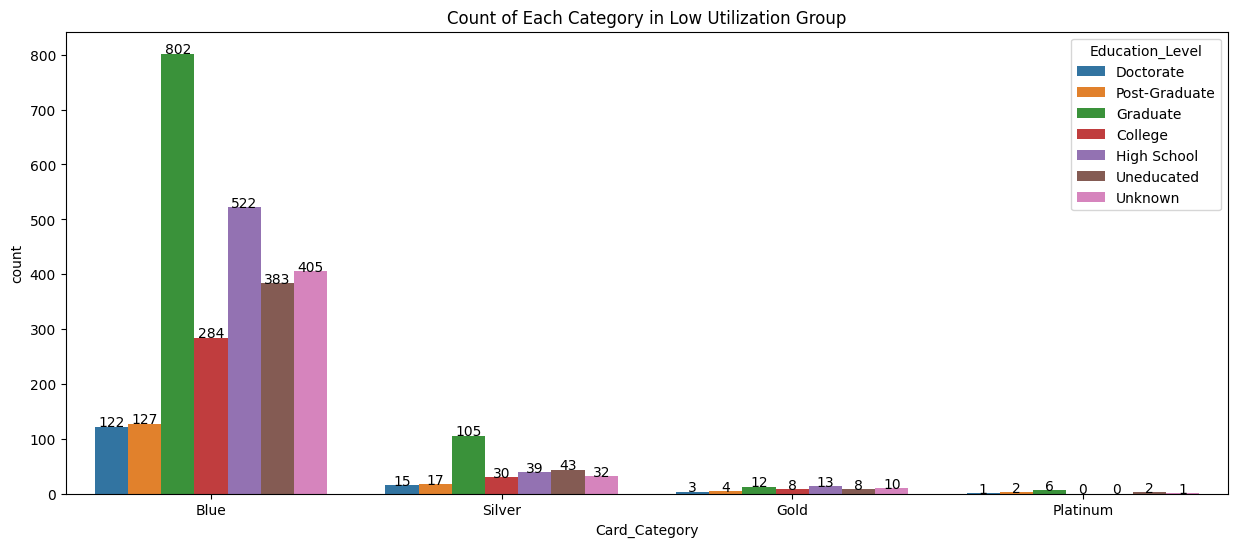

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = low_utilization_data, hue='Education_Level', hue_order=education_order)
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in Low Utilization Group')
plt.show()

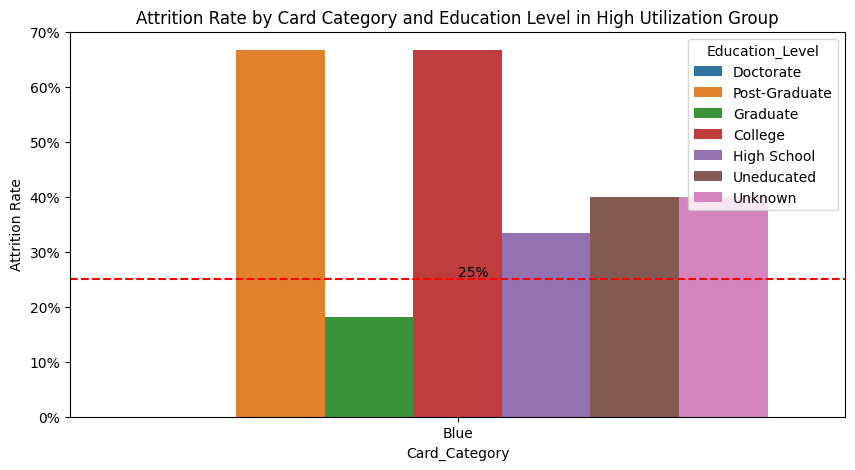

In [ ]:
high_utilization_data = creditcard_clean[creditcard_clean['Avg_Utilization_Group'] == 'High Utilization']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=high_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Education_Level', hue_order=education_order, ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Education Level in High Utilization Group')
plt.show()

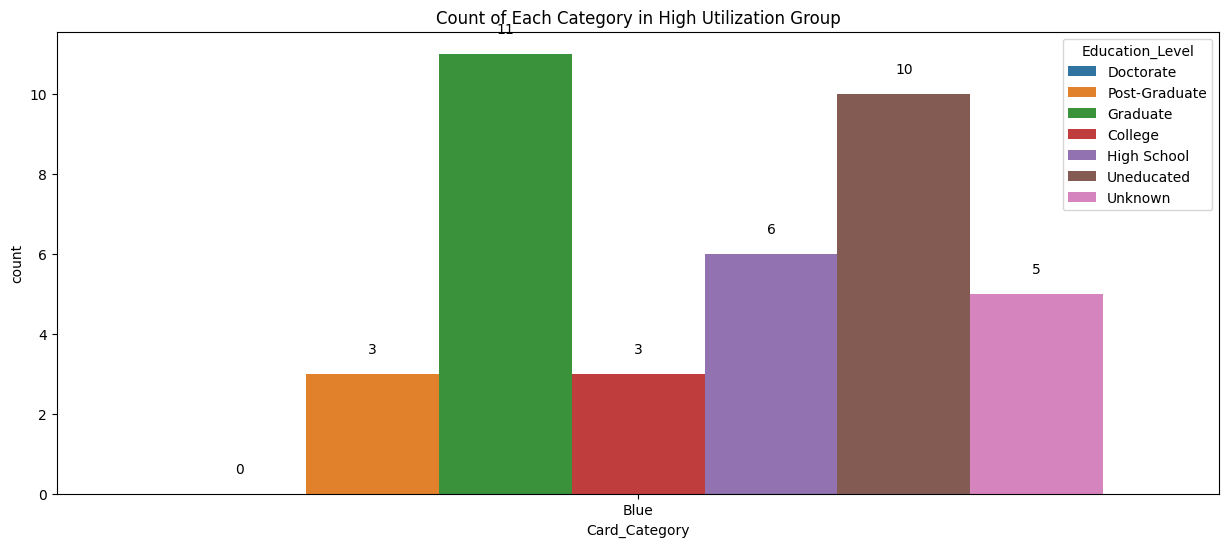

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = high_utilization_data, hue='Education_Level', hue_order=education_order)
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in High Utilization Group')
plt.show()

### In the low utilization group, with an attrition rate benchmark at 25%, we aim to target all education levels for Blue Card users and Post-Graduate. In the high utilization group, our focus is on Blue Card users, targeting all education levels except Graduate and Doctorate.

### 6. Which Total Relationship Count Group Requires Focus?

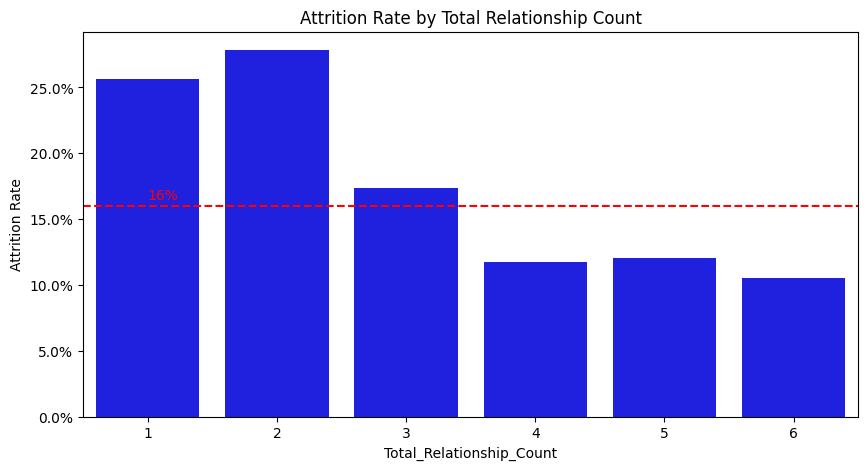

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
relation_plot=sns.barplot(data=creditcard_clean, x='Total_Relationship_Count', y='Attrition_Binary', color='blue', errorbar=None)
relation_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Total Relationship Count')
plt.show()

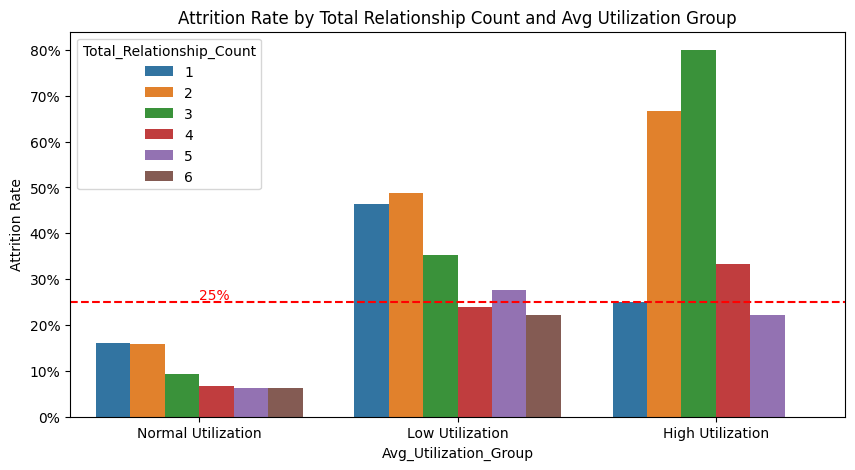

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=creditcard_clean, x='Avg_Utilization_Group', y='Attrition_Binary', hue='Total_Relationship_Count', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Total Relationship Count and Avg Utilization Group')
plt.show()

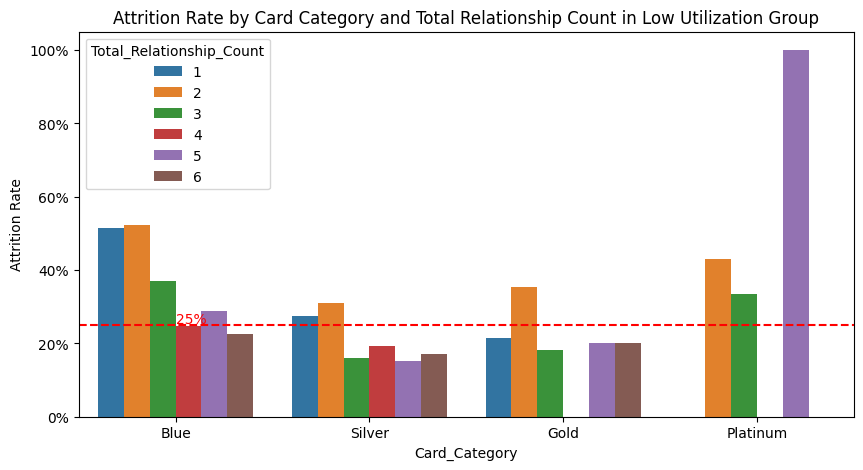

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=low_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Total_Relationship_Count', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Total Relationship Count in Low Utilization Group')
plt.show()

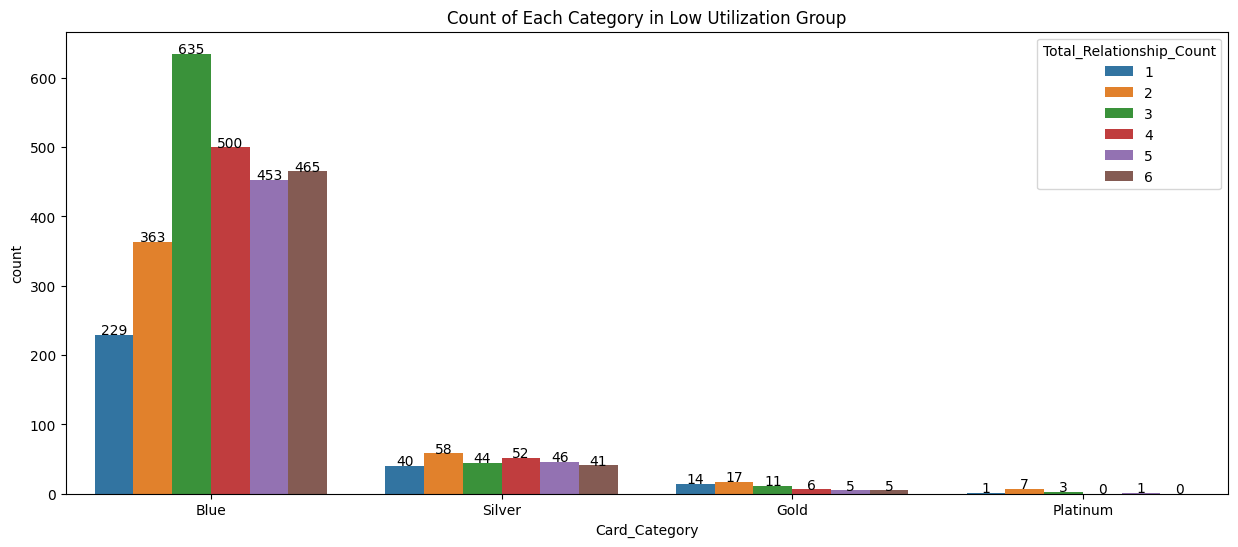

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = low_utilization_data, hue='Total_Relationship_Count')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in Low Utilization Group')
plt.show()

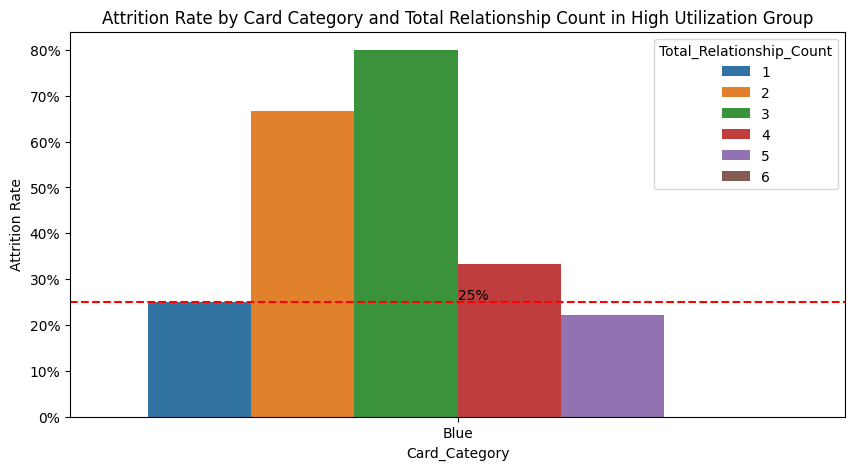

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=high_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Total_Relationship_Count', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Card Category and Total Relationship Count in High Utilization Group')
plt.show()

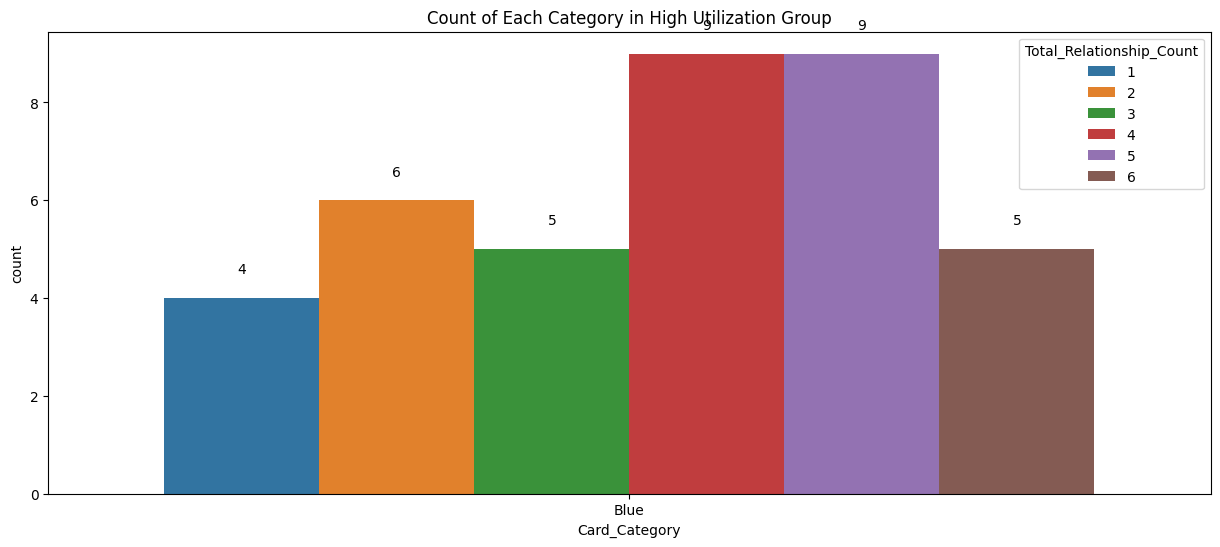

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = high_utilization_data, hue='Total_Relationship_Count')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in High Utilization Group')
plt.show()

### In the low utilization group, with an attrition rate target set at 25%, our focus is on Blue Card users with 3 or fewer accounts (can also include users with 5 accounts). In the high utilization group, we are targeting users with 2 to 4 accounts.

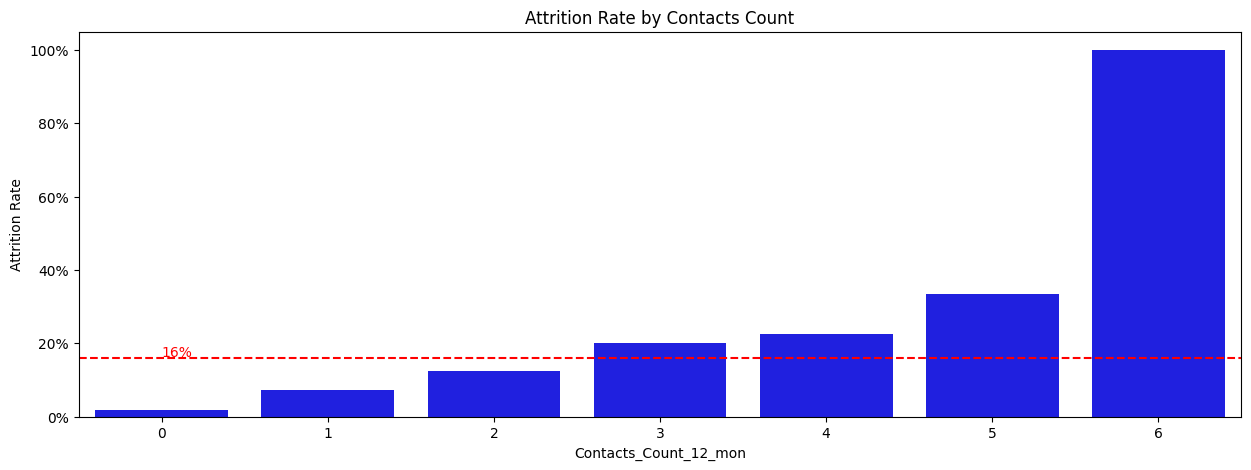

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
contacts_plot=sns.barplot(data=creditcard_clean, x='Contacts_Count_12_mon', y='Attrition_Binary', color='blue', errorbar=None)
contacts_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Contacts Count')
plt.show()

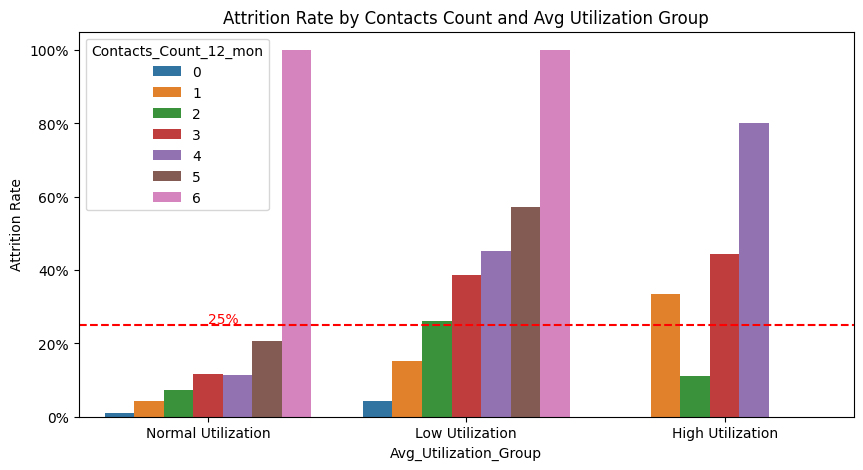

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=creditcard_clean, x='Avg_Utilization_Group', y='Attrition_Binary', hue='Contacts_Count_12_mon', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Contacts Count and Avg Utilization Group')
plt.show()

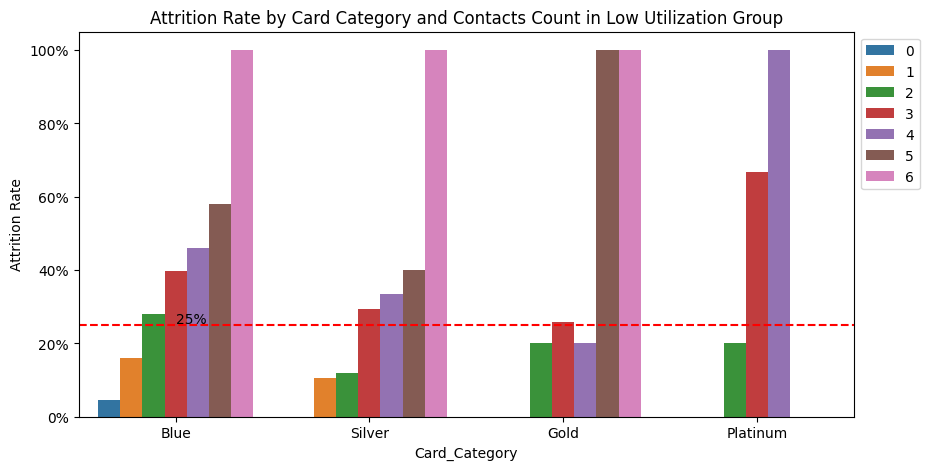

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=low_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Contacts_Count_12_mon', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Attrition Rate by Card Category and Contacts Count in Low Utilization Group')
plt.show()

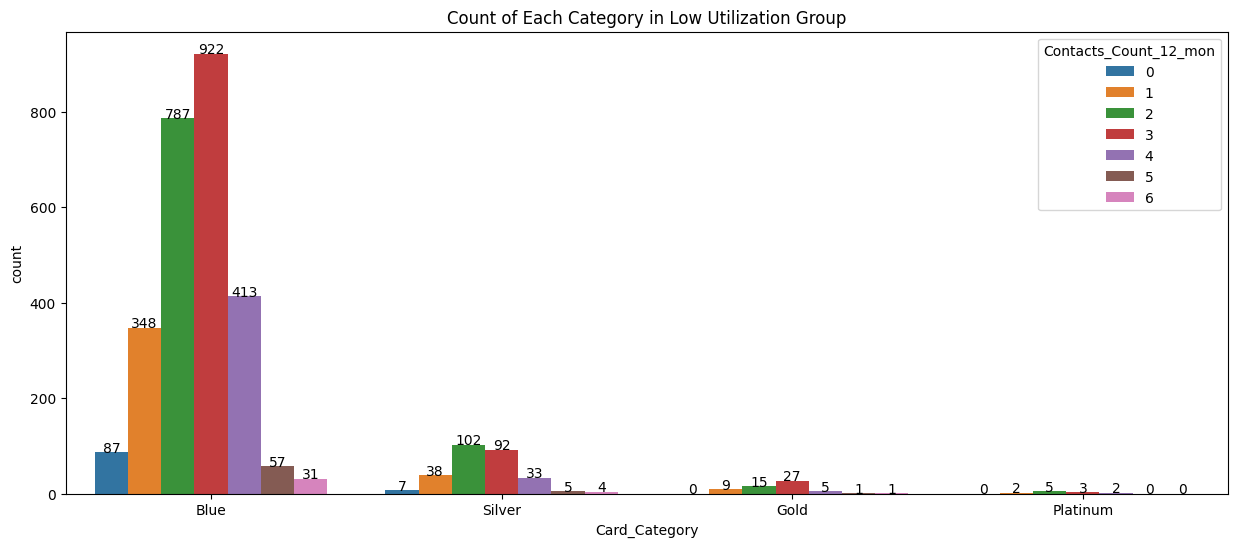

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = low_utilization_data, hue='Contacts_Count_12_mon')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in Low Utilization Group')
plt.show()

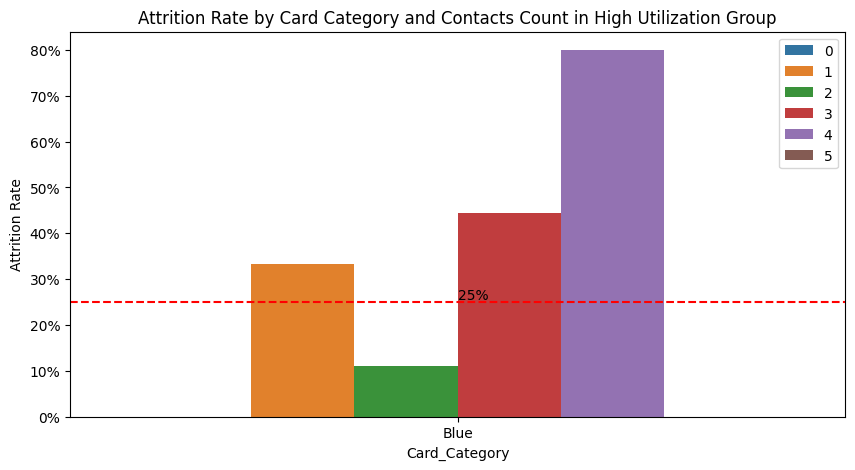

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=high_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Contacts_Count_12_mon', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Attrition Rate by Card Category and Contacts Count in High Utilization Group')
plt.show()

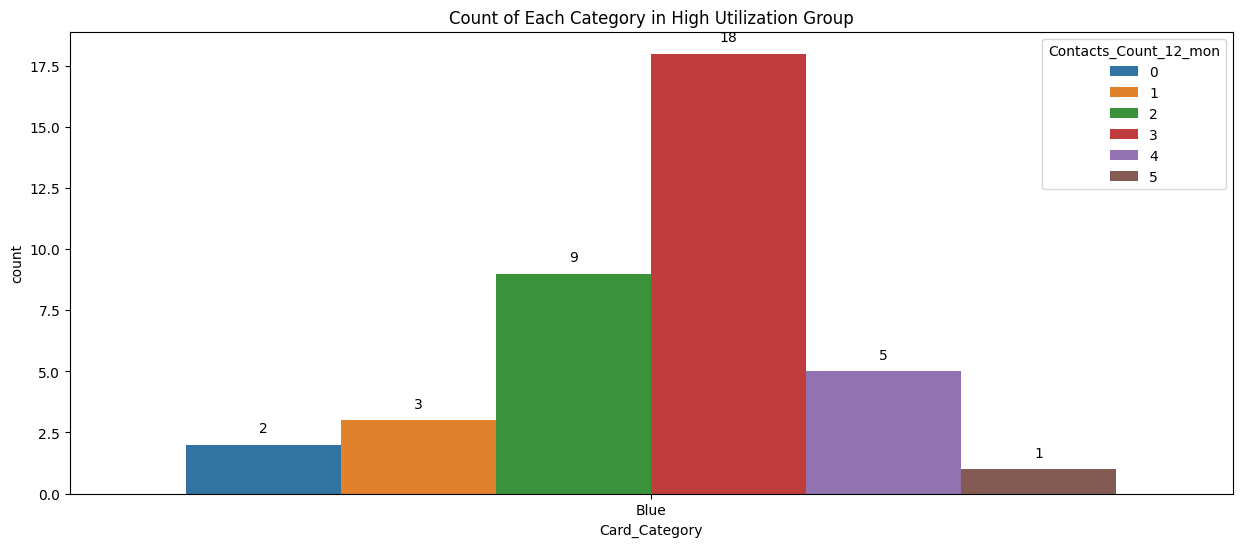

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = high_utilization_data, hue='Contacts_Count_12_mon')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in High Utilization Group')
plt.show()

### In all customer groups, a contact count of 6 corresponds to a 100% attrition rate (54 customers), indicating a definite departure from the credit card program. For the low utilization group, our focus is on Blue Card holders with 2 to 5 contacts. In the high utilization group, our target is Blue Card holders with 1, 3, or 4 contacts.

### 7. Credit Limit v.s. Average Utilization Ratio

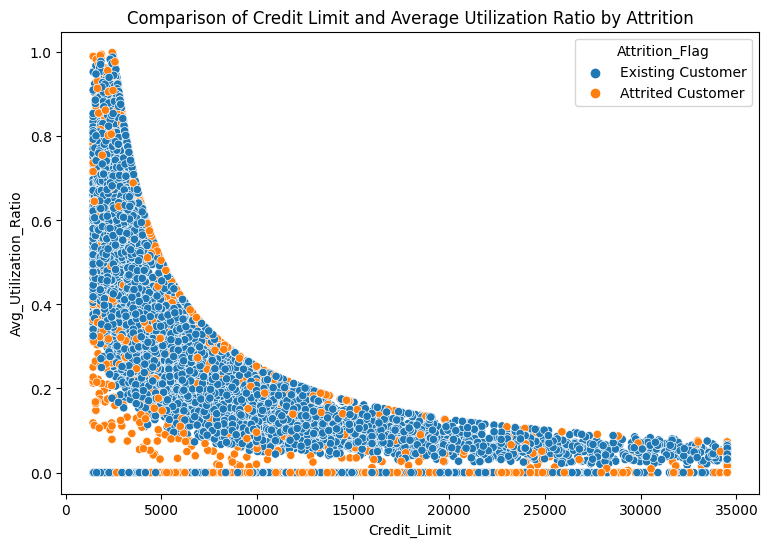

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data=creditcard_clean, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', ax=ax)
plt.title('Comparison of Credit Limit and Average Utilization Ratio by Attrition')
plt.show()

In [ ]:
bin_edges_creditlimit=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 
9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 
20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000]
creditcard_clean['Credit_Limit_Bin']=pd.cut(
    creditcard_clean['Credit_Limit'], bins=bin_edges_creditlimit, labels=['0-1k',
    '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k', '8k-9k', '9k-10k', '10k-11k',
    '11k-12k', '12k-13k', '13k-14k', '14k-15k', '15k-16k', '16k-17k', '17k-18k', '18k-19k', '19k-20k',
    '20k-21k', '21k-22k', '22k-23k', '23k-24k', '24k-25k', '25k-26k', '26k-27k', '27k-28k', '28k-29k', '29k-30k',
    '30k-31k', '31k-32k', '32k-33k', '33k-34k', '34k-35k'], right=False)
creditcard_clean[['Credit_Limit_Bin', 'Credit_Limit']].head()

Credit_Limit_Bin  Credit_Limit
0          12k-13k       12691.0
1            8k-9k        8256.0
2            3k-4k        3418.0
3            3k-4k        3313.0
4            4k-5k        4716.0

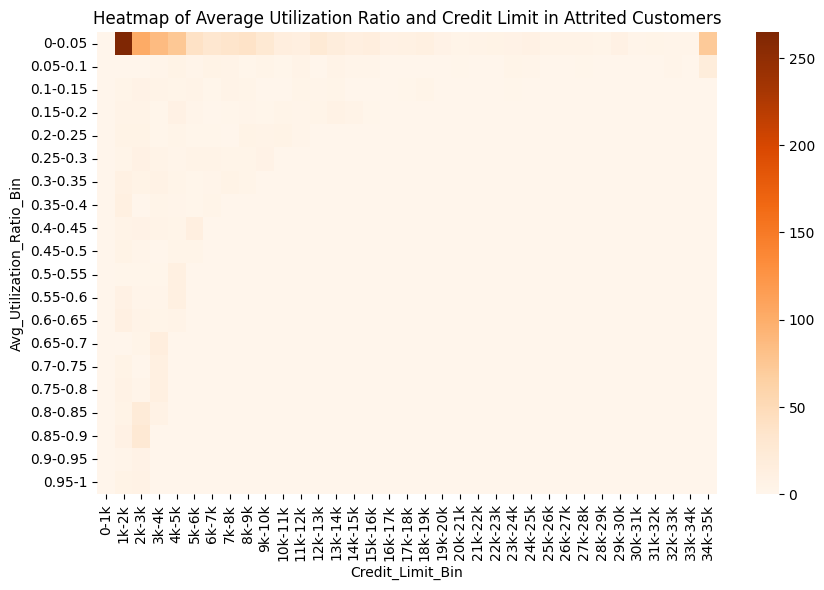

In [ ]:
attrited_customer = creditcard_clean[creditcard_clean['Attrition_Flag'] == 'Attrited Customer']
pivot_table = attrited_customer.pivot_table(values= 'Attrition_Flag', index='Avg_Utilization_Ratio_Bin', columns='Credit_Limit_Bin', aggfunc='count')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="Oranges")
plt.title('Heatmap of Average Utilization Ratio and Credit Limit in Attrited Customers')
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


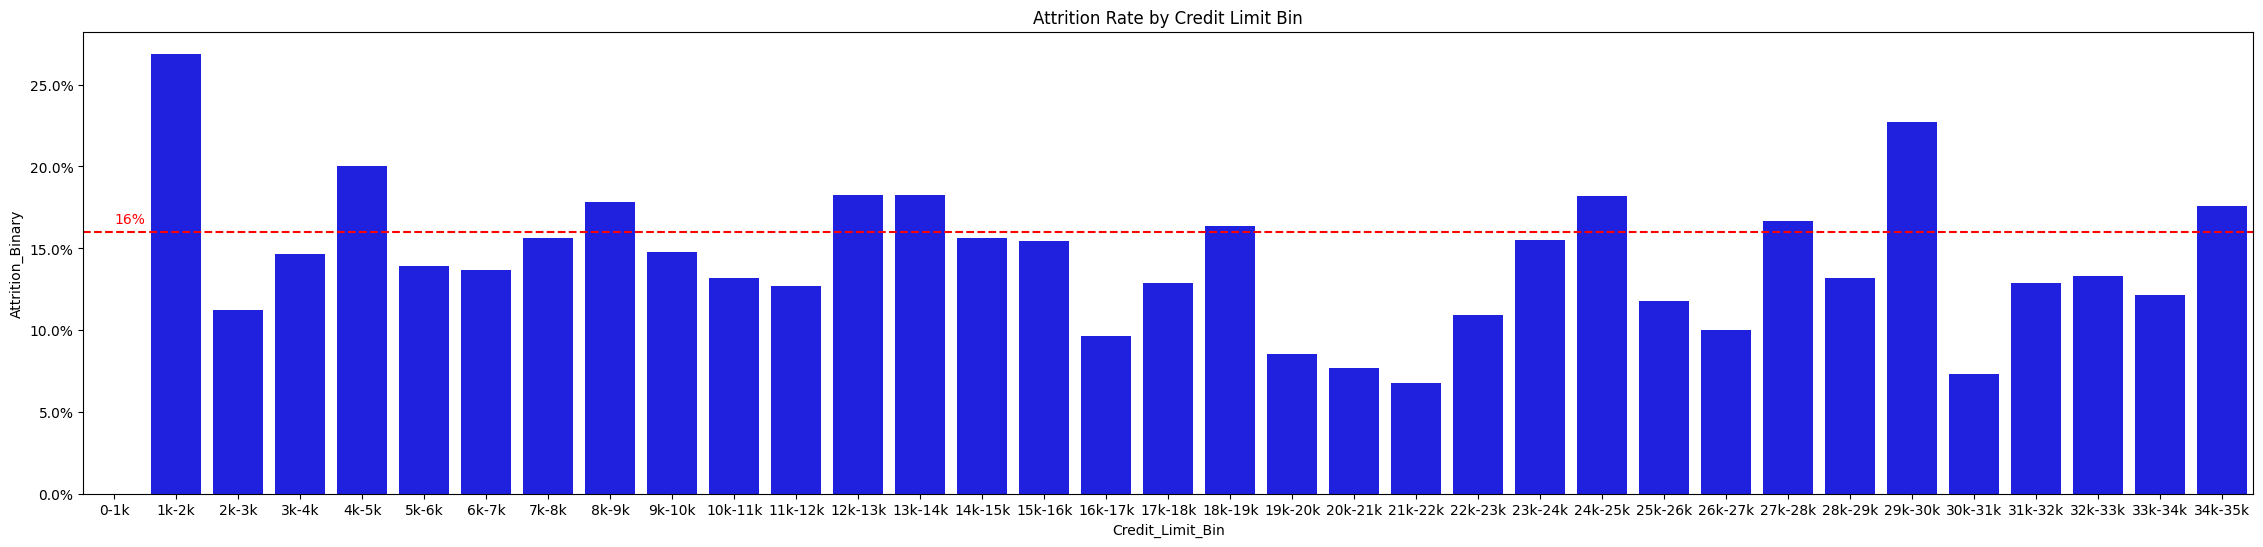

In [ ]:
fig, ax = plt.subplots(figsize=(28,6))
sns.barplot(x='Credit_Limit_Bin', y='Attrition_Binary', data=creditcard_clean, color='blue', errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.title('Attrition Rate by Credit Limit Bin')
plt.show()

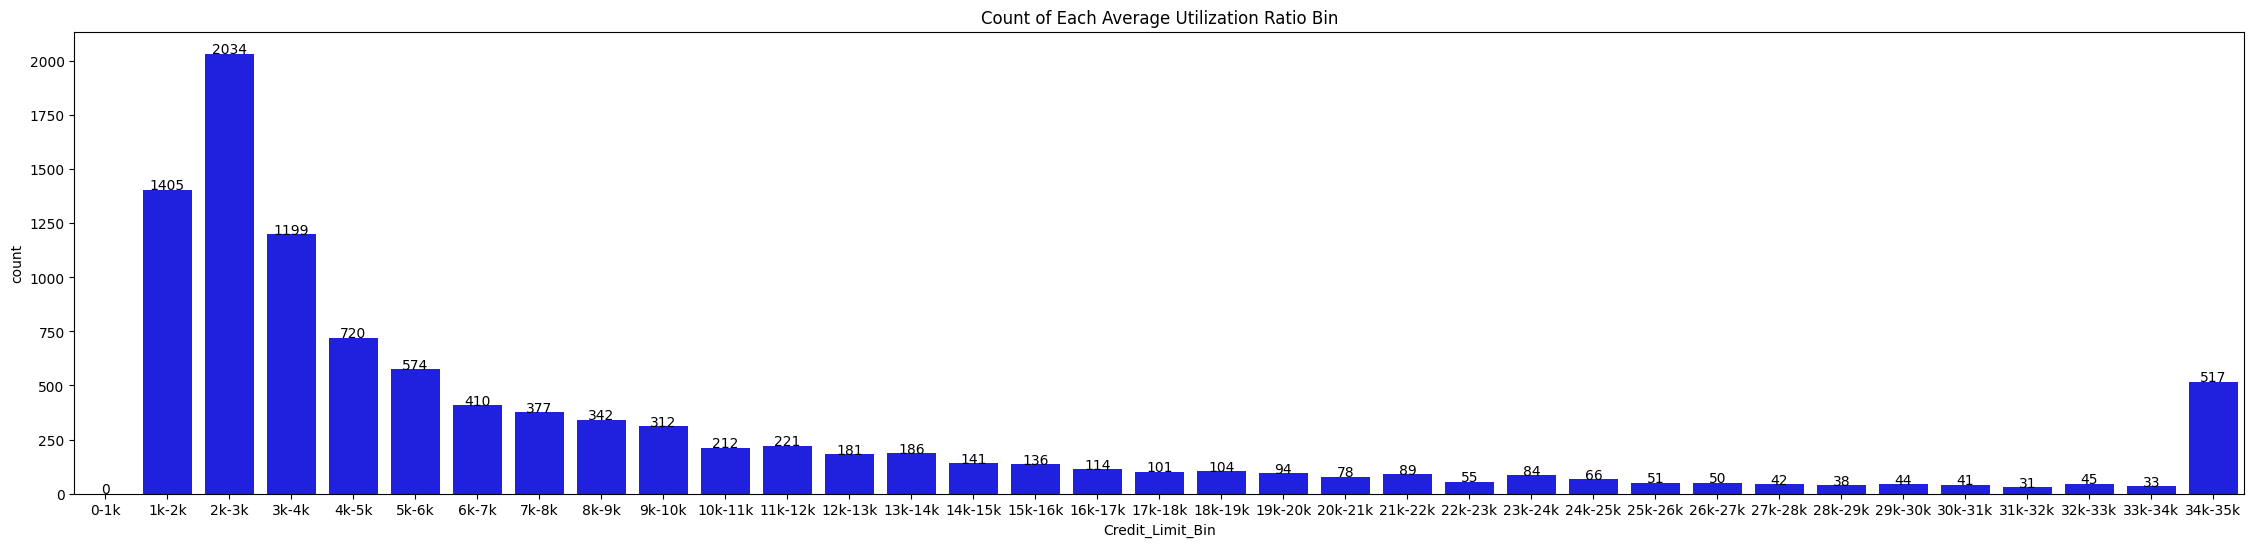

In [ ]:
fig, ax = plt.subplots(figsize= (28,6))
count_barplot = sns.countplot(x = 'Credit_Limit_Bin', data = creditcard_clean, color = 'blue')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Average Utilization Ratio Bin')
plt.show()

### 1. From the scatter plot, the relationship between the average utilization ratio and credit limit indicates that a higher credit limit corresponds to a lower utilization ratio.                                                                               2. From the heatmap and bar plots, there exists a cluster in the low average utilization group, and these attrited customers maintain a credit limit range between $1000 to $4000 or so.

### 8. Credit Limit v.s. Total Transaction Amount & Total Transaction Count

In [ ]:
total_trans_num_zeros = (creditcard_clean['Total_Trans_Amt'] == 0).sum()
print(f"The number of zero Total_Trans_Amt is {total_trans_num_zeros}.")

The number of zero Total_Trans_Amt is 0.


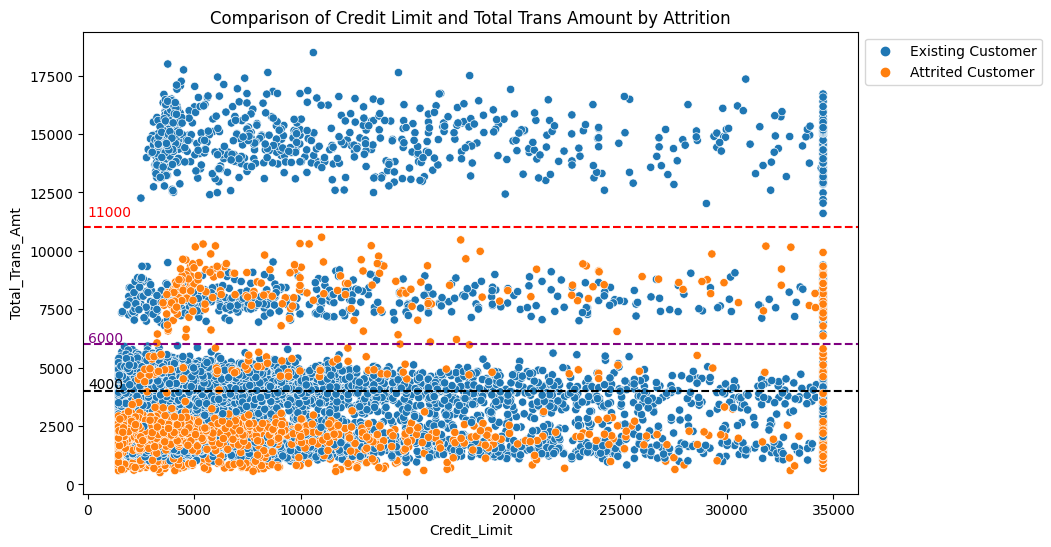

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=creditcard_clean, x='Credit_Limit', y='Total_Trans_Amt', hue ='Attrition_Flag', ax=ax)
plt.axhline(y= 11000, color='r', linestyle='--')
plt.text(0.0, 11500, '11000', color='r')
plt.axhline(y= 4000, color='black', linestyle='--')
plt.text(0.0, 4100, '4000', color='black')
plt.axhline(y= 6000, color='purple', linestyle='--')
plt.text(0.0, 6100, '6000', color='purple')
plt.title('Comparison of Credit Limit and Total Trans Amount by Attrition')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

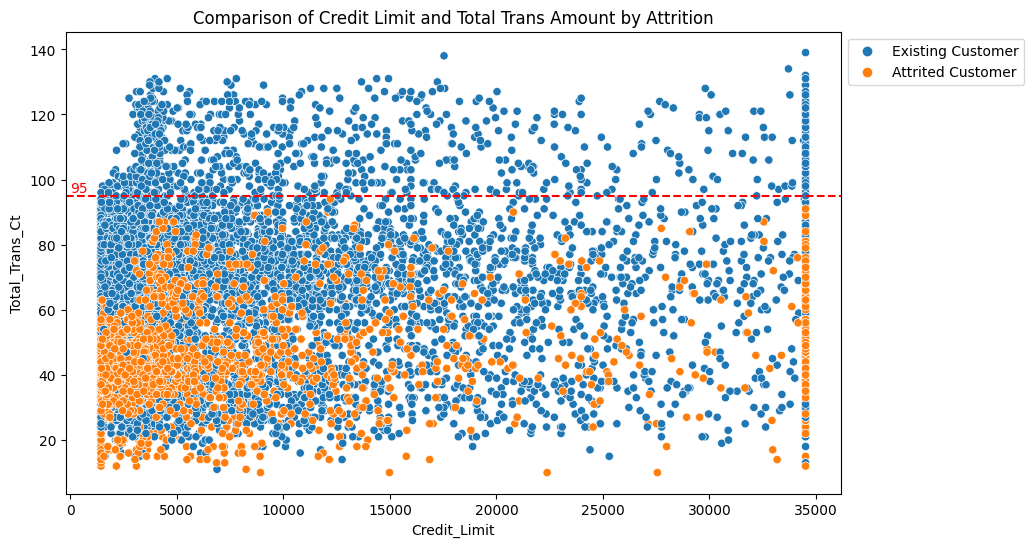

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=creditcard_clean, x='Credit_Limit', y='Total_Trans_Ct', hue ='Attrition_Flag', ax=ax)
plt.axhline(y= 95, color='r', linestyle='--')
plt.text(0.0, 96, '95', color='r')
plt.title('Comparison of Credit Limit and Total Trans Amount by Attrition')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
max_credit_limit = creditcard_clean['Credit_Limit'].max()
num_max_credit_limit = (creditcard_clean['Credit_Limit'] == max_credit_limit).sum()
filtered_df= creditcard_clean[creditcard_clean['Total_Trans_Amt'] < 11000]
num_max_credit_limit_filtered = (filtered_df['Credit_Limit'] == max_credit_limit).sum()
maxcreditlimit_df =filtered_df[filtered_df['Credit_Limit'] == max_credit_limit]
count = (maxcreditlimit_df['Attrition_Flag'] == 'Attrited Customer').sum()
print(count)
print(f"The maximum credit limit in the dataset is {max_credit_limit}.")
print(f"The number of maximum credit limits in the dataset is {num_max_credit_limit}.")
print(f"The number of maximum credit limits with less than 11000 transaction in the dataset is {num_max_credit_limit_filtered}.")

89
The maximum credit limit in the dataset is 34516.0.
The number of maximum credit limits in the dataset is 508.
The number of maximum credit limits with less than 11000 transaction in the dataset is 414.


In [ ]:
print(creditcard_clean['Total_Trans_Amt'].min())

510


In [ ]:
bin_edges_totaltrans=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000]
creditcard_clean['Total_Trans_1KBin']=pd.cut(
    creditcard_clean['Total_Trans_Amt'], bins=bin_edges_totaltrans, labels=['0-1k',
    '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k', '8k-9k', '9k-10k', '10k-11k'], right=False)
creditcard_clean[['Total_Trans_1KBin', 'Total_Trans_Amt']].head()

Total_Trans_1KBin  Total_Trans_Amt
0             1k-2k             1144
1             1k-2k             1291
2             1k-2k             1887
3             1k-2k             1171
4              0-1k              816

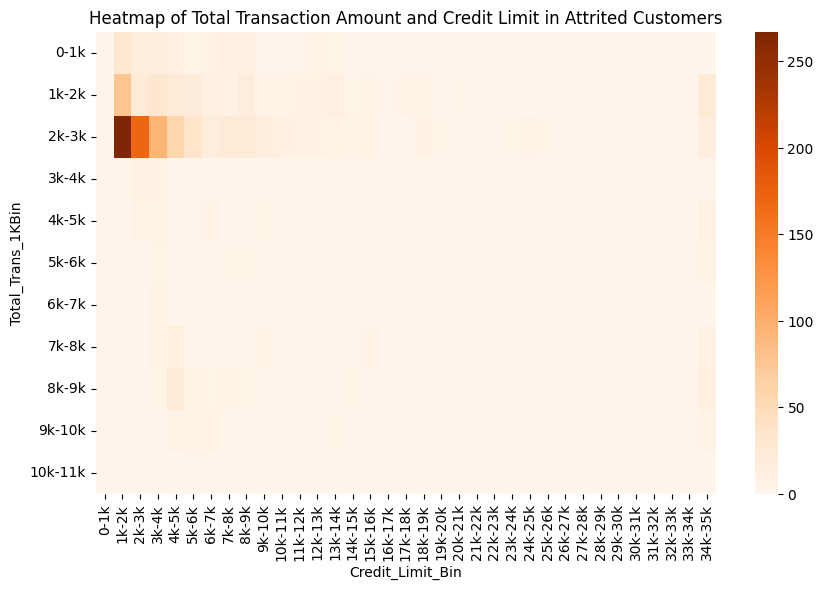

In [ ]:
attrited_customer = creditcard_clean[creditcard_clean['Attrition_Flag'] == 'Attrited Customer']
pivot_table = attrited_customer.pivot_table(values= 'Attrition_Flag', index='Total_Trans_1KBin', columns='Credit_Limit_Bin', aggfunc='count')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="Oranges")
plt.title('Heatmap of Total Transaction Amount and Credit Limit in Attrited Customers')
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


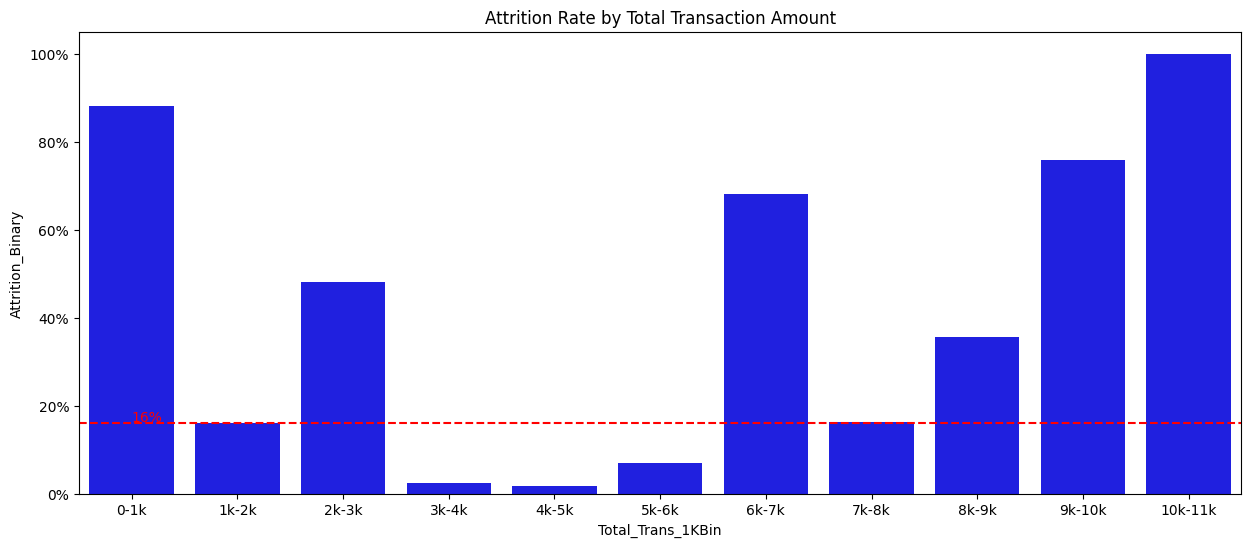

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='Total_Trans_1KBin', y='Attrition_Binary', data=creditcard_clean, color='blue', errorbar=None)
plt.axhline(y=0.16, color='r', linestyle='--')
plt.text(0.0, 0.165, '16%', color='r')
plt.title('Attrition Rate by Total Transaction Amount')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

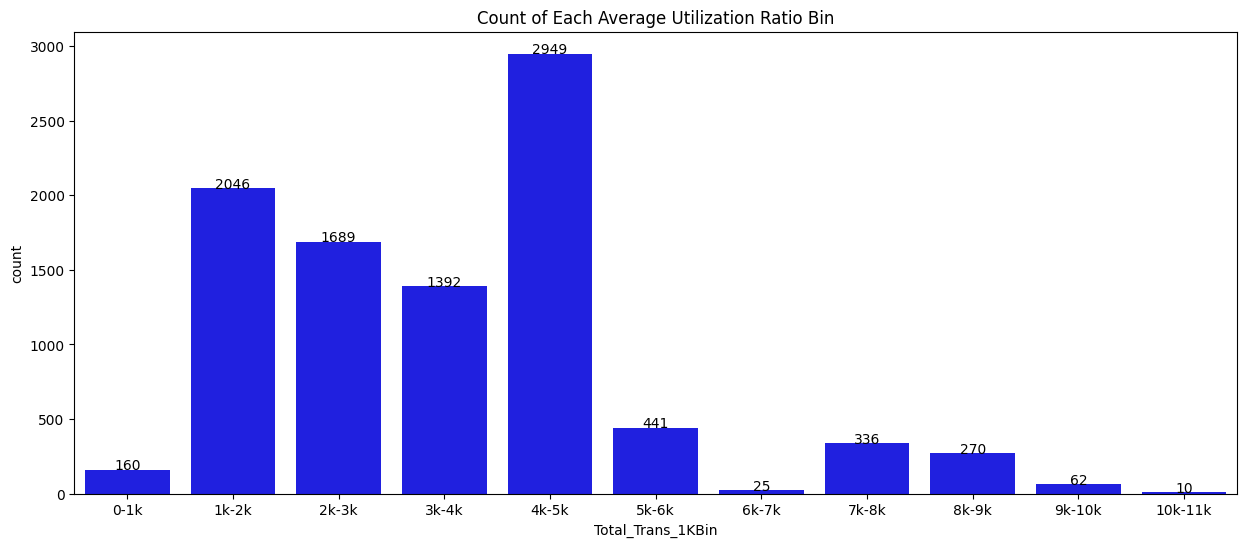

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Total_Trans_1KBin', data = creditcard_clean, color = 'blue')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Average Utilization Ratio Bin')
plt.show()

### Upon examining the scatter plot comparing total transaction amount and credit limit for attrited customers, we made two observations:                                                                                                                          1. The clusters can be categorized into four groups based on total transaction amount: $0-$3000, $3000-$6000, $6000-$11000, and above $11000.
2. For total transaction amounts above $11000, the attrition rate is 0.

In [ ]:
bin_edges = [0, 3000, 6000, 11000, 175000]
creditcard_clean['Total_Trans_Amt_Bin']=pd.cut(
    creditcard_clean['Total_Trans_Amt'], bins=bin_edges, labels=['0-3000', '3000-6000', '6000-11000', '11000-17500'], right=False)
print(creditcard_clean[['Total_Trans_Amt_Bin', 'Total_Trans_Amt']])

      Total_Trans_Amt_Bin  Total_Trans_Amt
0                  0-3000             1144
1                  0-3000             1291
2                  0-3000             1887
3                  0-3000             1171
4                  0-3000              816
...                   ...              ...
10122         11000-17500            15476
10123          6000-11000             8764
10124          6000-11000            10291
10125          6000-11000             8395
10126          6000-11000            10294

[10127 rows x 2 columns]


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


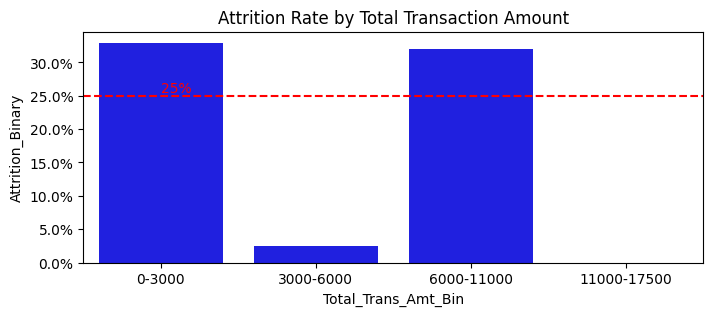

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
sns.barplot(x='Total_Trans_Amt_Bin', y='Attrition_Binary', data=creditcard_clean, color='blue', errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.title('Attrition Rate by Total Transaction Amount')
plt.show()

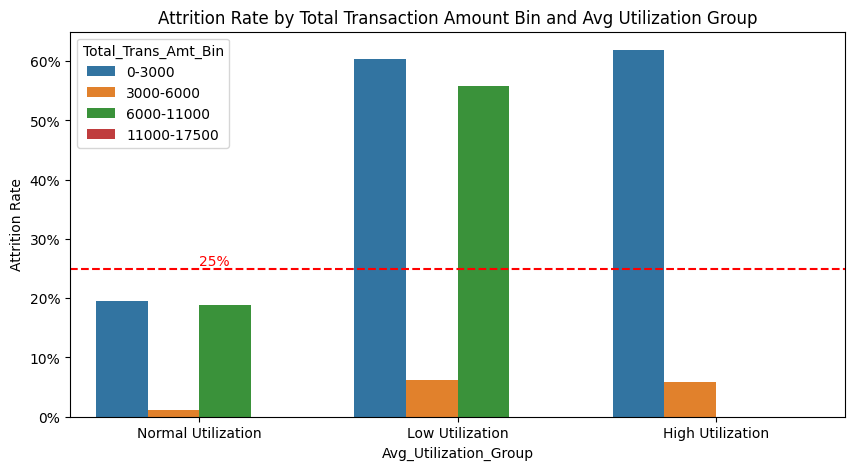

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=creditcard_clean, x='Avg_Utilization_Group', y='Attrition_Binary', hue='Total_Trans_Amt_Bin', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='r')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Total Transaction Amount Bin and Avg Utilization Group')
plt.show()

      Total_Trans_Amt_Bin  Total_Trans_Amt
0                  0-3000             1144
1                  0-3000             1291
2                  0-3000             1887
3                  0-3000             1171
4                  0-3000              816
...                   ...              ...
10122         11000-17500            15476
10123          6000-11000             8764
10124          6000-11000            10291
10125          6000-11000             8395
10126          6000-11000            10294

[10127 rows x 2 columns]


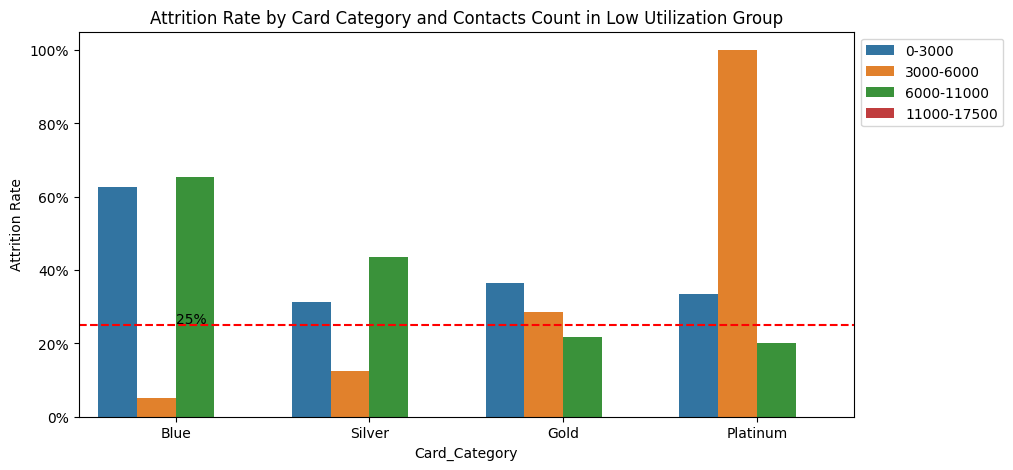

In [ ]:
low_utilization_data=low_utilization_data.copy()
low_utilization_data['Total_Trans_Amt_Bin'] = pd.cut(
    creditcard_clean['Total_Trans_Amt'], bins=bin_edges, labels=['0-3000', '3000-6000', '6000-11000', '11000-17500'], right=False)
print(creditcard_clean[['Total_Trans_Amt_Bin', 'Total_Trans_Amt']])
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=low_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Total_Trans_Amt_Bin', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Attrition Rate by Card Category and Contacts Count in Low Utilization Group')
plt.show()

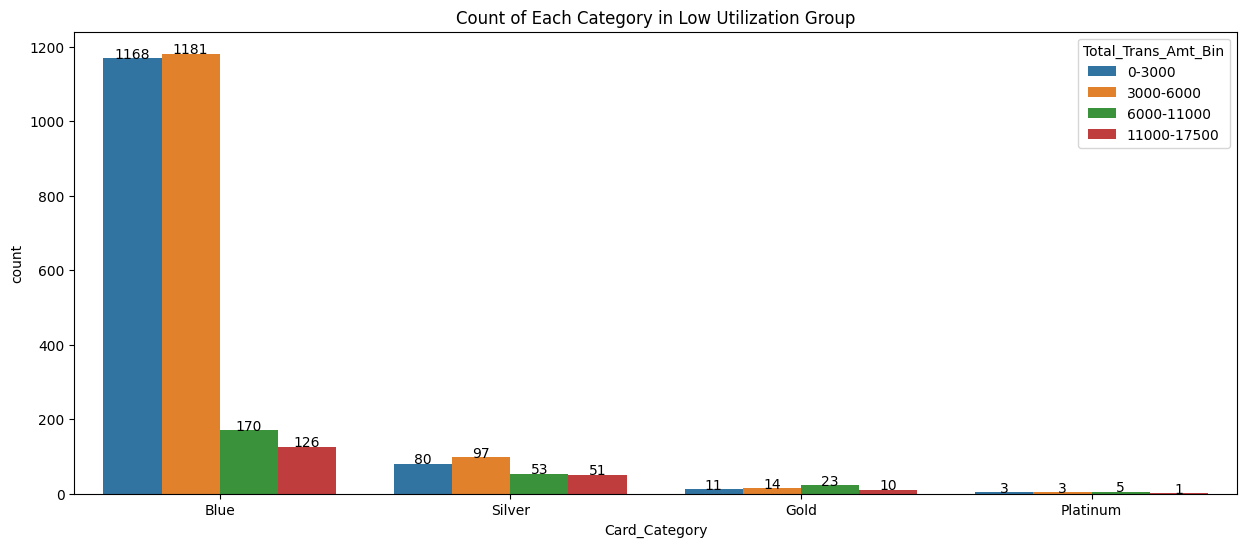

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = low_utilization_data, hue='Total_Trans_Amt_Bin')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in Low Utilization Group')
plt.show()

      Total_Trans_Amt_Bin  Total_Trans_Amt
0                  0-3000             1144
1                  0-3000             1291
2                  0-3000             1887
3                  0-3000             1171
4                  0-3000              816
...                   ...              ...
10122         11000-17500            15476
10123          6000-11000             8764
10124          6000-11000            10291
10125          6000-11000             8395
10126          6000-11000            10294

[10127 rows x 2 columns]


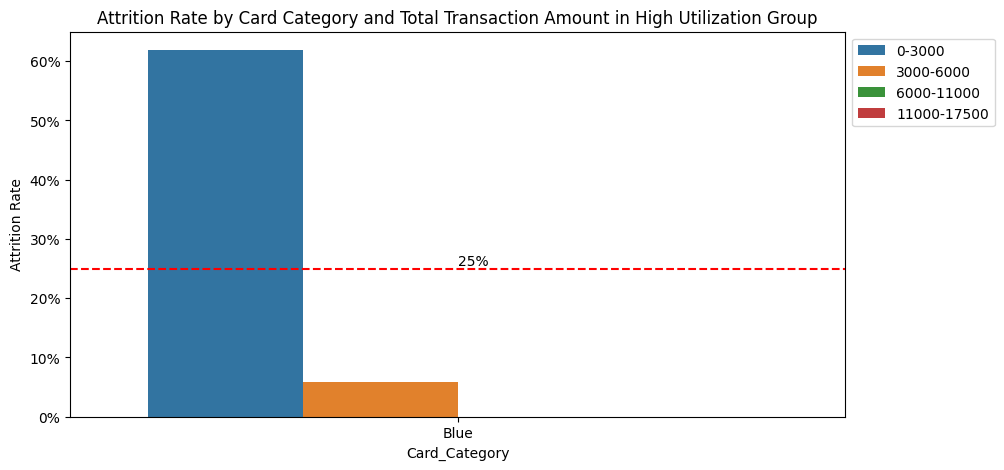

In [ ]:
high_utilization_data=high_utilization_data.copy()
high_utilization_data['Total_Trans_Amt_Bin'] = pd.cut(
    creditcard_clean['Total_Trans_Amt'], bins=bin_edges, labels=['0-3000', '3000-6000', '6000-11000', '11000-17500'], right=False)
print(creditcard_clean[['Total_Trans_Amt_Bin', 'Total_Trans_Amt']])
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=high_utilization_data, x='Card_Category', y='Attrition_Binary', hue='Total_Trans_Amt_Bin', ax=ax, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.text(0.0, 0.255, '25%', color='black')
plt.ylabel('Attrition Rate')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Attrition Rate by Card Category and Total Transaction Amount in High Utilization Group')
plt.show()

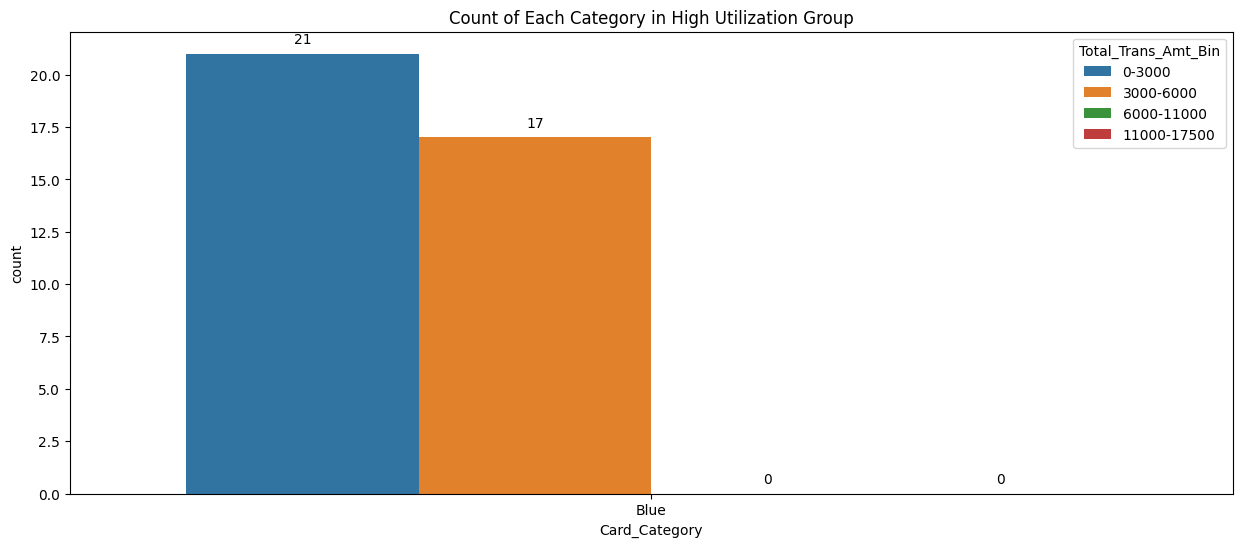

In [ ]:
fig, ax = plt.subplots(figsize= (15,6))
count_barplot = sns.countplot(x = 'Card_Category', data = high_utilization_data, hue='Total_Trans_Amt_Bin')
for p in count_barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Count of Each Category in High Utilization Group')
plt.show()

### When setting the attrition rate benchmark at 25%, our target within the low utilization group includes blue card users with a total transaction amount below $3000 and between $6000-$11000.                                                                                                      In the high utilization group, we only need to target blue card users with 0 to $3000 total transaction amount.

# Insights

### Target Card Holders: Our primary target will be Blue card customers, as they constitute over 93% of both attrited and existing customers. If the budget permits, we may also consider focusing on other card users that shows similar high attrition rate (above 25%).

### Card Usage & Attrition Rate: Customers with either a low (below 0.05) or high (above 0.95) utilization ratio exhibit an attrition rate exceeding 30%. Attrition among low utilization customers could be attributed to card abandonment, while other factors might influence the attrition of high utilization customers.

### Marital Status & Attrition Rate: In the low utilization group, all marital statuses of blue card users. In the high utilization group, we need to target single, divorced and unknown marital status blue card users. *There is only ONE customer in the high_utilization unknown group.

### Income Category & Attrition Rate: In the low utilization group, we aim to target all income categories for Blue Card users, and the ‘Less than $40K’ and ‘$40K-$60K’ groups for Platinum Card users (they have a total population of 3 with a 100% attrition rate). For the high utilization group (above 0.95), our focus is on Blue Card users in the ‘Less than $40K’, ‘$40K - $60K’, and ‘$80K-$120K’ income groups.

### Education Level & Attrition Rate: In the low utilization group, we aim to target all education levels for Blue Card users. In the high utilization group, our focus is on Blue Card users, targeting all education levels except Graduate and Doctorate.

### Associate Accounts & Attrition Rate: In the low utilization group, with an attrition rate target set at 25%, our focus is on Blue Card users with 3 or fewer accounts (can also include users with 5 accounts). In the high utilization group, we are targeting Blue Card users with 2 to 4 accounts.

### Contact Counts & Attrition Rate: In all customer groups, a contact count of 6 corresponds to a 100% attrition rate (54 customers). For the low utilization group, our focus is on Blue Card holders with 2 to 5 contacts. In the high utilization group, our target is Blue Card holders with 1, 3, or 4 contacts.

### Total Transaction Amount & Attrition Rate: Our target within the low utilization group includes blue card users with a total transaction amount below $3000 and between $6000-$11000. In the high utilization group, we only need to target blue card users with 0 to $3000 total transaction amount.

### Total Transaction Amount & Credit Limit:                                                                                                                       1. There are four clusters of the scatter plot, and can be categorized into four groups based on total transaction amount: $0-$3000, $3000-$6000, $6000-$11000, and above $11000 (no customer attrition).
2. Many attrited customers fall within the $2000 to $3000 total transaction amount range and the $1000 to $4000 credit limit category.

# Future Works

### Moving forward, we aim to collaborate with our team to explore the potential of reducing customer churn to 12% using our findings. To achieve this, we plan to introduce retention offers to our target customer groups, such as an additional 3% cash back bonus in different categories each quarter, reduced late payment interest fees, and added benefits for Blue credit card holders after specifying the potential needs of different categories of card holders.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7bb3ee84-823b-4a7d-b650-8ddcde7799f9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>